In [ ]:
pip install google-generativeai transformers datasets accelerate peft trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Logging into Hugging Face using token
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling
)
import datasets
import peft
import numpy as np
import os

from huggingface_hub import login

hf_token = os.environ.get("Llama")
login(token=hf_token, add_to_git_credential=True)

print("Hugging Face login successful!")

# Check GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


Hugging Face login successful!
Using device: cuda


In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 33.3 MB/s eta 0:00:00


In [ ]:
!pip install pytorch


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [ ]:
# prompt: how to check Python version

import sys
sys.version

'3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]'

In [ ]:
import torch
print ("GPU available:", torch.cuda.is_available())


GPU available: True


## Loading model Llama-2-13b version 4-bit

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("unsloth/llama-2-13b-bnb-4bit")
model = AutoModelForCausalLM.from_pretrained("unsloth/llama-2-13b-bnb-4bit", device_map="auto",
    offload_folder="/content/drive/MyDrive/offload",  # Path for offloaded layers
    offload_state_dict=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 5120, padding_idx=0)
    (layers): ModuleList(
      (0-39): 40 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (k_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (v_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (o_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (up_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (down_proj): Linear4bit(in_features=13824, out_features=5120, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((5120,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((5120,), eps=1e-05)
      )
    )
    (norm): Lla

In [ ]:
# Interact with the model
def chat_with_model(prompt, max_new_tokens=150):
    """
    Improved interaction function with:
    - Better prompt formatting
    - Conversation history handling
    - Error handling
    """
    try:
        # Format the prompt correctly for Llama 2 chat
        formatted_prompt = f"{prompt}"

        # Tokenize and generate
        inputs = tokenizer(formatted_prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,

            do_sample=False
        )

        # Decode and clean the output
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Remove the input prompt from response
        response = response.replace(formatted_prompt, "").strip()
        return response

    except Exception as e:
        return f"Error: {str(e)}"

# Example usage in Colab:
while True:
    user_input = input("You: ")
    if user_input.lower() in ['exit', 'quit']:
        break
    response = chat_with_model(user_input)
    print("\nLlama 2:", response, "\n")

You: what is LLM models?


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



Llama 2: LLM models are a type of machine learning model that is used to generate text. They are based on the idea of a neural network, which is a type of artificial intelligence that is designed to mimic the way the human brain works.
LLM models are used to generate text that is similar to the text that is generated by humans. They are used in a variety of applications, including chatbots, customer service, and content generation.
LLM models are also used to generate text that is similar to the text that is generated by other machine learning models. They are used in a variety of applications, including chatbots, customer service, and content generation.
LLM models are a type of machine learning model that 

You: can Garlic cure Covid-19?

Llama 2: Garlic is a plant that has been used for centuries for its medicinal properties. It is known to have antibacterial, antifungal, and antiviral properties.
Garlic is a plant that has been used for centuries for its medicinal properties. It i

## Loading data

In [ ]:
# Load train, validation and test data of HealthFact
import pandas as pd
healthfact_train = pd.read_csv("/content/HealthFact_traindata_.csv")

healthfact_test = pd.read_csv("/content/Cleaned_Test_Dataset.csv")

In [ ]:
# prompt: get 100 random rows from healthfact_test

import pandas as pd

# Assuming healthfact_test is already loaded as a pandas DataFrame
# If not, load it first: healthfact_test = pd.read_csv("/content/Cleaned_Test_Dataset.csv")

# Get 100 random rows
healthfact_test_sample = healthfact_test.sample(n=100)

# Now 'random_rows' contains 100 randomly selected rows from healthfact_test
healthfact_test_sample.head(10)

,Unnamed: 0,claim_id,claim,explanation,label
1091,1093,29204,A Harvard study proved that “unvaccinated chil...,Describing her “open letter” published on an a...,false
519,520,6223,Aid groups descend on Indonesia quake zone; de...,Humanitarian organizations descended on Indone...,true
251,251,37027,Senator Harry Reid said that he was injured i...,Harry Reid Was Injured in a Fight With His Bro...,MISLEADING
336,336,38610,Discussion forums and social media have been ...,Chic-fil-A Offers Free Meal for New Mothers,MISLEADING
996,998,11327,Estrogen Patch in Newly Postmenopausal Women M...,A small pilot study has found that giving rece...,MISLEADING
373,374,7051,Pediatrics group backs bill to allow minors to...,The New York chapters of the American Academy ...,true
241,241,27274,Arizona State Senate candidate Bobby Wilson fa...,"As of July 2018, Wilson is running as a Republ...",true
618,620,14862,Ron Johnson said specifically that he hopes th...,"Feingold said ""Johnson said specifically that ...",MISLEADING
158,158,3108,Malaysia vaccinating for polio after first cas...,Malaysia began a vaccination campaign in a rur...,true
71,71,10970,"To reverse damage of sitting, take a brisk, ho...",This story reports on a large meta-analysis of...,true


In [ ]:
healthfact_train

,Unnamed: 0,claim_id,claim,explanation,label
0,0,15661,"""The money the Clinton Foundation took from fr...","""Gingrich said the Clinton Foundation """"took m...",FALSE
1,1,9893,Annual Mammograms May Have More False-Positives,This article reports on the results of a study...,MISLEADING
2,2,11358,SBRT Offers Prostate Cancer Patients High Canc...,This news release describes five-year outcomes...,MISLEADING
3,3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","While the story does many things well, the ove...",TRUE
4,4,11276,Some appendicitis cases may not require ’emerg...,We really don’t understand why only a handful ...,TRUE
...,...,...,...,...,...
9799,9827,35948,The Sturgis motorcycle rally in 2020 resulted ...,"They want to know if mass-events (protests, co...",MISLEADING
9800,9828,401,AstraZeneca's infant respiratory drug prioriti...,Britain’s AstraZeneca said a potential medicin...,TRUE
9801,9829,2023,Testicular cancer deaths double with after 40 ...,Men diagnosed with testicular cancer at 40 yea...,TRUE
9802,9830,38118,The FDA published “conclusive proof” that the...,FDA Confirms DTaP Vaccine Causes Autism in Nov...,FALSE


In [ ]:
healthfact_train

,Unnamed: 0,claim_id,claim,explanation,label
0,0,15661,"""The money the Clinton Foundation took from fr...","""Gingrich said the Clinton Foundation """"took m...",FALSE
1,1,9893,Annual Mammograms May Have More False-Positives,This article reports on the results of a study...,MISLEADING
2,2,11358,SBRT Offers Prostate Cancer Patients High Canc...,This news release describes five-year outcomes...,MISLEADING
3,3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","While the story does many things well, the ove...",TRUE
4,4,11276,Some appendicitis cases may not require ’emerg...,We really don’t understand why only a handful ...,TRUE
...,...,...,...,...,...
9799,9827,35948,The Sturgis motorcycle rally in 2020 resulted ...,"They want to know if mass-events (protests, co...",MISLEADING
9800,9828,401,AstraZeneca's infant respiratory drug prioriti...,Britain’s AstraZeneca said a potential medicin...,TRUE
9801,9829,2023,Testicular cancer deaths double with after 40 ...,Men diagnosed with testicular cancer at 40 yea...,TRUE
9802,9830,38118,The FDA published “conclusive proof” that the...,FDA Confirms DTaP Vaccine Causes Autism in Nov...,FALSE


In [ ]:
healthfact_train

In [ ]:
# prompt: Using dataframe healthfact_train: get 500 sample from healthfact_train

# Get a sample of 500 rows from the healthfact_train DataFrame.
healthfact_train_sample = healthfact_train.sample(n=500, random_state=42) # Set random_state for reproducibility

# Display the first few rows of the sample to verify.
healthfact_train_sample.head()


,Unnamed: 0,claim_id,claim,explanation,label
6637,6662,37661,"""In response to a """"no one should live in a cl...",Did JK Rowling Respond to ‘No One Should Live ...,FALSE
7888,7913,27059,Properties owned by Jared Kushner in the Balti...,“We pride ourselves on our level of customer s...,TRUE
4326,4337,7576,UN chief: Use pandemic to ‘rebuild our world f...,U.N. Secretary-General Antonio Guterres challe...,TRUE
3065,3076,41919,1 in 5 children in America goes to sleep hungr...,In talking about the importance of the 2018 mi...,MISLEADING
3132,3143,34343,Energy drinks caused an expectant father to lo...,"However, in the lack of additional information...",MISLEADING


In [ ]:
# prompt: Using dataframe healthfact_test_sample: turn MISLEADING in label to misleading

# Replace "MISLEADING" with "misleading" in the 'label' column
healthfact_test_sample['label'] = healthfact_test_sample['label'].replace('MISLEADING', 'misleading')


In [ ]:
# Replace "MISLEADING" with "misleading" in the 'label' column
healthfact_train_sample['label'] = healthfact_train_sample['label'].replace('MISLEADING', 'misleading')

NameError: name 'healthfact_train_sample' is not defined

In [ ]:
# Replace "MISLEADING" with "misleading" in the 'label' column
healthfact_test_sample['label'] = healthfact_test_sample['label'].replace('MISLEADING', 'misleading')

In [ ]:
healthfact_test_sample.head(10)


,Unnamed: 0,claim_id,claim,explanation,label
948,950,33568,A megalodon capsized a South African charter v...,Does a monster megalodon shark named 'Submarin...,false
630,632,3704,Complacency a concern as AIDS treatment improv...,AIDS has no cure. HIV is still here. But some ...,true
228,228,31986,"The term ""Black Friday"" originated with the pr...","However, the earliest known use of this accoun...",false
1088,1090,4343,Missouri student on Columbia campus has active...,University of Missouri officials say a student...,true
249,249,32112,"Hillary Clinton threw a tantrum, and a water g...",Rumors that Clinton threw a “tantrum” after NB...,false
822,824,6218,"Indonesia says avoid coast near volcano, feari...",Indonesian authorities urged people to avoid t...,true
55,55,8959,Too many people missing out on health benefits...,This news release touting the health benefits ...,false
1059,1061,9156,City of Hope researchers find regular use of a...,The release focuses on a recent paper publishe...,misleading
306,306,27050,Blue-green algae (known scientifically as cyan...,Toxic algae blooms typically occur in stagnant...,true
548,549,35292,Bats are pictured on the reverse of a U.S. qua...,Australian Prime Minister Scott Morrison issue...,misleading


In [ ]:
healthfact_train_sample

,Unnamed: 0,claim_id,claim,explanation,label
6637,6662,37661,"""In response to a """"no one should live in a cl...",Did JK Rowling Respond to ‘No One Should Live ...,false
7888,7913,27059,Properties owned by Jared Kushner in the Balti...,“We pride ourselves on our level of customer s...,true
4326,4337,7576,UN chief: Use pandemic to ‘rebuild our world f...,U.N. Secretary-General Antonio Guterres challe...,true
3065,3076,41919,1 in 5 children in America goes to sleep hungr...,In talking about the importance of the 2018 mi...,misleading
3132,3143,34343,Energy drinks caused an expectant father to lo...,"However, in the lack of additional information...",misleading
...,...,...,...,...,...
311,311,2576,Large Europe majorities for assisted suicide: ...,Large majorities of west Europeans favor the l...,true
4900,4911,3763,Bill to raise tobacco age has unlikely allies:...,Congress is moving to pass the biggest new sal...,true
5594,5611,14874,29 mass shootings have been committed by conce...,"""When we looked, the Gun Free UT blog included...",misleading
1078,1078,29817,"""In 2018 or 2019, Brea Olinda Unified School D...","Taking the foregoing facts into account, we is...",false


In [ ]:
healthfact_test_sample

,Unnamed: 0,claim_id,claim,explanation,label
1091,1093,29204,A Harvard study proved that “unvaccinated chil...,Describing her “open letter” published on an a...,false
519,520,6223,Aid groups descend on Indonesia quake zone; de...,Humanitarian organizations descended on Indone...,true
251,251,37027,Senator Harry Reid said that he was injured i...,Harry Reid Was Injured in a Fight With His Bro...,MISLEADING
336,336,38610,Discussion forums and social media have been ...,Chic-fil-A Offers Free Meal for New Mothers,MISLEADING
996,998,11327,Estrogen Patch in Newly Postmenopausal Women M...,A small pilot study has found that giving rece...,MISLEADING
...,...,...,...,...,...
650,652,26626,The federal government is “preparing to mobili...,There is no evidence that the federal governme...,false
89,89,22584,"For thousands of public employees, Wisconsin G...",Wisconsin AFL-CIO says Gov. Scott Walker’s bud...,MISLEADING
575,576,11338,Heart Device Cuts Death Rate,This piece asked more tough questions than the...,true
695,697,10711,Millions face risk from drug-coated stents,Drug-eluting or drug-coated stents were first ...,MISLEADING


## Baseline model LLama-2-13B testing on 100 samples of Healthfact datasets.


In [ ]:
def predict_claim(claim, tokenizer, model):
    """Predict the label for a given claim."""

    # Create the input prompt
    prompt = f""" You are a fact-checking AI.
    Classify the following claim as exactly one of these labels: "true", "false", or "misleading".

    Claim: "{claim}".
    Answer: Only respond with "true", "false", or "misleading". Do not add extra text.
    Answer:
    """

    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate the model's response
    outputs = model.generate(
        **inputs,
        max_new_tokens=10,  # Reduced max_new_tokens to force shorter response
        do_sample=False,  # Disabled randomness
    )

    # Extract the predicted label
    response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip().lower()
    print("This is response: ", response)

    label_start_index = response.find("the claim is") + len("the claim is")
    predicted_label = response[label_start_index:].strip().split()[0].lower().replace('"', '').replace('.', '')
    print('This is the label:', predicted_label)
    # Ensure the predicted label is valid
    if predicted_label in ["true", "false", "misleading"]:
         return predicted_label
    else:
         return "unknown"  # Handle bad outputs


In [ ]:
from sklearn.metrics import accuracy_score
import torch
# Predict the labels for the claims in the dataset
predicted_labels = []
for claim in healthfact_test_sample["claim"]:
    predicted_label = predict_claim(claim, tokenizer, model)
    print(f"Claim: {claim}\nPredicted Label: {predicted_label}\n")
    predicted_labels.append(predicted_label)

# Evaluate the model's performance
accuracy = accuracy_score(healthfact_test_sample["label"], predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

This is response:  you are a fact-checking ai.
    classify the following claim as exactly one of these labels: "true", "false", or "misleading".

    claim: "the healthy skeptic: products make testosterone claims".
    answer: only respond with "true", "false", or "misleading". do not add extra text.
    answer:
    
    the healthy skeptic: product
This is the label: act-checking
Claim: The Healthy Skeptic: Products make testosterone claims
Predicted Label: unknown

This is response:  you are a fact-checking ai.
    classify the following claim as exactly one of these labels: "true", "false", or "misleading".

    claim: "a bill supported by gov. scott walker makes it "so that drunk drivers who kill have an easier time of it.".
    answer: only respond with "true", "false", or "misleading". do not add extra text.
    answer:
    
    the claim is "true".
This is the label: true
Claim: A bill supported by Gov. Scott Walker makes it "so that drunk drivers who kill have an easier time o

So when I test the base model on 100 sample Healthfact dataset without training I got 27% accuracy.

## Pre-train Llama model with Healthfact dataset




Now I will fine-tuning the model with LoRa and train, validate model on 300 samples and 100 sample from HealthFact training and validation dataset and then test the model again on 100 sample- dataset of Healthfact as above and compare.

In [ ]:
#Loading data
import pandas as pd
healthfact_train = pd.read_csv("/content/HealthFact_traindata_.csv")
healthfact_val= pd.read_csv("/content/Cleaned_dev_Dataset.csv")
healthfact_test=healthfact_test_sample

In [ ]:
# prompt: i want to get 300 random samples from healthfact_train, 100 random samples from healthfact_val

import pandas as pd

# Assuming healthfact_train and healthfact_val are already loaded as pandas DataFrames
# If not, load them first:
# healthfact_train = pd.read_csv("/content/HealthFact_traindata_.csv")
# healthfact_val = pd.read_csv("/content/Cleaned_dev_Dataset.csv")

# Get 300 random samples from healthfact_train
healthfact_train_sample = healthfact_train.sample(n=500, random_state=42)  # random_state for reproducibility

# Get 100 random samples from healthfact_val
healthfact_val_sample = healthfact_val.sample(n=100, random_state=42)  # random_state for reproducibility

# Now you have two new DataFrames with random samples
print(healthfact_train_sample.head())
print(healthfact_val_sample.head())


      Unnamed: 0  claim_id                                              claim  \
6637        6662     37661  "In response to a ""no one should live in a cl...   
7888        7913     27059  Properties owned by Jared Kushner in the Balti...   
4326        4337      7576  UN chief: Use pandemic to ‘rebuild our world f...   
3065        3076     41919  1 in 5 children in America goes to sleep hungr...   
3132        3143     34343  Energy drinks caused an expectant father to lo...   

                                            explanation       label  
6637  Did JK Rowling Respond to ‘No One Should Live ...       FALSE  
7888  “We pride ourselves on our level of customer s...        TRUE  
4326  U.N. Secretary-General Antonio Guterres challe...        TRUE  
3065  In talking about the importance of the 2018 mi...  MISLEADING  
3132  However, in the lack of additional information...  MISLEADING  
     Unnamed: 0  claim_id                                              claim  \
739         7

In [ ]:
healthfact_val_sample.head(20)

,Unnamed: 0,claim_id,claim,explanation,label
739,745,39738,In an effort preserve the mainstream ch...,Smithsonian Admits Destroying Giant Human Skel...,NaN
788,794,6871,Surgeon fined $3K for removing kidney he thoug...,The Florida Board of Medicine says a West Palm...,NaN
43,46,31225,Women absorb and retain DNA from every man the...,"We are also unsure, for the record, what motiv...",NaN
155,158,26490,The president looks like he was ahead of the c...,Former U.S. Sen. Rick Santorum on Monday defen...,NaN
494,500,8402,Thai PM asks rich for help with coronavirus fa...,Thai Prime Minister Prayuth Chan-ocha called o...,true
969,975,9977,Study fuels low-fat vs. low-carb debate,This article summarizes a recent research stud...,NaN
270,276,9565,Babies Should Eat Eggs and Peanuts Early to Av...,This is a brief story looking at a systematic ...,NaN
590,596,34106,The high-dose Fluzone vaccine caused the death...,Because no evidence is provided for the claim ...,NaN
123,126,17533,Nearly 40 percent of his McAllen-area constitu...,Lucio said nearly 40 percent of his McAllen-ar...,misleading
113,116,37974,Former Vice President Joe Biden received five ...,Did Joe Biden Receive Five Deferments During t...,NaN


In [ ]:
healthfact_train_sample['label']=healthfact_train_sample['label'].str.lower()

In [ ]:
healthfact_val_sample['label']=healthfact_val_sample['label'].str.lower()

In [ ]:
healthfact_test_sample['label']=healthfact_test_sample['label'].str.lower()

In [ ]:
healthfact_train_sample

,Unnamed: 0,claim_id,claim,explanation,label
6637,6662,37661,"""In response to a """"no one should live in a cl...",Did JK Rowling Respond to ‘No One Should Live ...,false
7888,7913,27059,Properties owned by Jared Kushner in the Balti...,“We pride ourselves on our level of customer s...,true
4326,4337,7576,UN chief: Use pandemic to ‘rebuild our world f...,U.N. Secretary-General Antonio Guterres challe...,true
3065,3076,41919,1 in 5 children in America goes to sleep hungr...,In talking about the importance of the 2018 mi...,misleading
3132,3143,34343,Energy drinks caused an expectant father to lo...,"However, in the lack of additional information...",misleading
...,...,...,...,...,...
8746,8774,10242,Bitter Taste Receptors Found in Lungs May Aid ...,"""At least the University that issued the news ...",false
8257,8282,13516,My opponent has no child care plan.,"""Trump said that """"my opponent has no child ca...",false
1732,1735,26826,“(A recent study) said ‘Medicare for All’ will...,"Many of the study's assumptions are flawed, an...",false
872,872,8036,U.S. group bombards doctors with coronavirus p...,Dr. Eric Anderson had just finished vacuuming ...,true


In [ ]:
healthfact_val_sample.head(20)

,Unnamed: 0,claim_id,claim,explanation,label
739,745,39738,In an effort preserve the mainstream ch...,Smithsonian Admits Destroying Giant Human Skel...,false
788,794,6871,Surgeon fined $3K for removing kidney he thoug...,The Florida Board of Medicine says a West Palm...,true
43,46,31225,Women absorb and retain DNA from every man the...,"We are also unsure, for the record, what motiv...",false
155,158,26490,The president looks like he was ahead of the c...,Former U.S. Sen. Rick Santorum on Monday defen...,false
494,500,8402,Thai PM asks rich for help with coronavirus fa...,Thai Prime Minister Prayuth Chan-ocha called o...,true
969,975,9977,Study fuels low-fat vs. low-carb debate,This article summarizes a recent research stud...,true
270,276,9565,Babies Should Eat Eggs and Peanuts Early to Av...,This is a brief story looking at a systematic ...,false
590,596,34106,The high-dose Fluzone vaccine caused the death...,Because no evidence is provided for the claim ...,false
123,126,17533,Nearly 40 percent of his McAllen-area constitu...,Lucio said nearly 40 percent of his McAllen-ar...,true
113,116,37974,Former Vice President Joe Biden received five ...,Did Joe Biden Receive Five Deferments During t...,true


In [ ]:
healthfact_test_sample

,Unnamed: 0,claim_id,claim,explanation,label
309,309,9177,New blood test may predict cardiovascular even...,The news release reports on research suggestin...,misleading
1019,1021,7402,Boy with rare disease gets brand new skin with...,Doctors treating a critically ill boy with a d...,true
425,426,35186,Cristina Higgins authored a personal account a...,And finally for those who say that this is jus...,true
548,549,35292,Bats are pictured on the reverse of a U.S. qua...,Australian Prime Minister Scott Morrison issue...,misleading
206,206,16104,There is no good data showing secondhand smoke...,"Stossel said ""there is no good data showing se...",false
...,...,...,...,...,...
59,59,41644,Spending on mental health went up by £575 mill...,This refers to the increase in spending by Cli...,misleading
214,214,33461,The use of cellular phones poses a danger of t...,Rumor holds that the use of cellular phones po...,false
187,187,9712,Penn study: Pay patients to take their pills,"Researchers studied about 1,500 patients with ...",true
591,592,40946,"Italy has concluded Covid-19 is not a virus, a...","Incorrect. Covid-19 is caused by a virus, call...",false


In [ ]:
healthfact_val_sample['label']=healthfact_val_sample['label'].str.lower()

In [ ]:
healthfact_test_sample['label']=healthfact_test_sample['label'].str.lower()

In [ ]:
# prompt: Using dataframe healthfact_train: want to change 'MISLEADING' in column label to 'misleading'. I mean in the column 'label' want to change the MISLEADING

# Replace 'MISLEADING' with 'misleading' in the 'label' column
healthfact_train['label'] = healthfact_train['label'].replace('MISLEADING', 'misleading')
# Replace 'MISLEADING' with 'misleading' in the 'label' column
healthfact_val['label'] = healthfact_val['label'].replace('MISLEADING', 'misleading')




In [ ]:
healthfact_val_sample['label'] = healthfact_val_sample['label'].replace('MISLEADING', 'misleading')

In [ ]:
healthfact_val_sample

,Unnamed: 0,claim_id,claim,explanation,label
739,745,39738,In an effort preserve the mainstream ch...,Smithsonian Admits Destroying Giant Human Skel...,false
788,794,6871,Surgeon fined $3K for removing kidney he thoug...,The Florida Board of Medicine says a West Palm...,true
43,46,31225,Women absorb and retain DNA from every man the...,"We are also unsure, for the record, what motiv...",false
155,158,26490,The president looks like he was ahead of the c...,Former U.S. Sen. Rick Santorum on Monday defen...,false
494,500,8402,Thai PM asks rich for help with coronavirus fa...,Thai Prime Minister Prayuth Chan-ocha called o...,true
...,...,...,...,...,...
514,520,35560,Dr. Anthony Fauci wrote in a 2005 paper publis...,"As mentioned earlier, the above-displayed scre...",false
244,250,9720,Talk Therapy Found to Ease Schizophrenia,Update: The Times has issued a correction to t...,true
467,473,11150,Genetic tests detect new way to fight war on b...,The story discusses new genetic tests that may...,true
493,499,26596,“Bill Gates told us about the coronavirus in 2...,Bill Gates gave a TED talk in 2015 about how w...,true


In [ ]:
healthfact_test_sample

,Unnamed: 0,claim_id,claim,explanation,label
948,950,33568,A megalodon capsized a South African charter v...,Does a monster megalodon shark named 'Submarin...,false
630,632,3704,Complacency a concern as AIDS treatment improv...,AIDS has no cure. HIV is still here. But some ...,true
228,228,31986,"The term ""Black Friday"" originated with the pr...","However, the earliest known use of this accoun...",false
1088,1090,4343,Missouri student on Columbia campus has active...,University of Missouri officials say a student...,true
249,249,32112,"Hillary Clinton threw a tantrum, and a water g...",Rumors that Clinton threw a “tantrum” after NB...,false
...,...,...,...,...,...
565,566,29249,The Swedish parliament rejected seven proposal...,What's true: The Swedish parliament did reject...,false
433,434,5783,Planned Parenthood: States should oppose Trump...,It’s time for states with leaders who support ...,true
38,38,760,"Suicide kills one person every 40 seconds, say...","Across the world, one person takes their own l...",true
97,97,28857,A photograh showing a body of water with two d...,"What's true: A photograph shows a ""dead zone"" ...",misleading


In [ ]:
#Preprocess data
label_map = {"true": 0, "false": 1, "misleading": 2}

def preprocess_function(examples):
    # Tokenize the input claims
    tokenized_inputs = tokenizer(
        examples["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

    # Map string labels to integer class indices
    labels = [label_map[label.lower()] if label.lower() in label_map else -1 for label in examples["label"]]
    tokenized_inputs["labels"] = labels

    return tokenized_inputs


In [ ]:
#Preprocess data
label_map = {"true": 0, "false": 1, "misleading": 2}

def preprocess_function(examples):
    # Tokenize the input claims
    tokenized_inputs = tokenizer(
        examples["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

    # Map string labels to integer class indices
    labels = [label_map[label.lower()] if label.lower() in label_map else -1 for label in examples["label"]]
    tokenized_inputs["labels"] = labels

    return tokenized_inputs

# Convert pandas DataFrames to datasets.Dataset
import datasets
train_dataset = datasets.Dataset.from_pandas(healthfact_train_sample)
val_dataset = datasets.Dataset.from_pandas(healthfact_val_sample)
test_dataset = datasets.Dataset.from_pandas(healthfact_test_sample)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
#Create the classification layer for the model
from transformers import AutoModelForCausalLM
from torch import nn
from peft import get_peft_model, LoraConfig

class LLaMAForSequenceClassification(nn.Module):
    def __init__(self, base_model, num_labels):
        super().__init__()
        self.model = base_model
        self.classifier = nn.Linear(base_model.config.hidden_size, num_labels)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        # Get hidden states from base model
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,  # Tell model to return all hidden layers
            return_dict=True,
        )

        # Grab the last hidden state (from the final layer)
        last_hidden_state = outputs.hidden_states[-1]  # Shape: (batch, seq_len, hidden_size)

        # Use the first token's hidden state as sentence representation
        cls_embedding = last_hidden_state[:, 0, :]  # [CLS] token-style pooling

        # Feed to classifier
        logits = self.classifier(cls_embedding)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return {"loss": loss, "logits": logits}


In [ ]:
# Set up LoRA config
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# Apply LoRA to the inner LLaMA model (before wrapping)
base_model = get_peft_model(model, lora_config)

# Wrap again with classification head
model_classify = LLaMAForSequenceClassification(base_model, num_labels)

In [ ]:
from transformers import AutoModelForCausalLM
from torch import nn
from peft import get_peft_model, LoraConfig
# Set up LoRA config - add more modules
lora_config = LoraConfig(
    r=32, #increase ranks
    lora_alpha=64,# increae lora_alpha
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"], # add more modules
    lora_dropout=0.05,
    bias="none",S
    task_type="CAUSAL_LM"
)

# Apply LoRA to the inner LLaMA model (before wrapping)
base_model = get_peft_model(model, lora_config)

# Wrap again with classification head
model_classify = LLaMAForSequenceClassification(base_model, 3)

In [ ]:
#Set up Training configuration
from transformers import Trainer, TrainingArguments
import os

os.environ["WANDB_DISABLED"] = "true"

training_args = TrainingArguments(
    output_dir="./llama2_lora_healthfact",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,
    eval_strategy="epoch",
    save_strategy="no",

    logging_dir="./logs",
    logging_steps=10,
    num_train_epochs=3,
    fp16=True,
    optim="adamw_bnb_8bit",  # Optimizer for quantized training

)

trainer = Trainer(
    model=model_classify,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
train_dataset

In [ ]:
train_dataset

Dataset({
    features: ['Unnamed: 0', 'claim_id', 'claim', 'explanation', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 300
})

In [ ]:
# Remove unnecessary columns but keep 'labels' for training:
train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
val_dataset = val_dataset.remove_columns(
    [col for col in val_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
test_dataset = test_dataset.remove_columns(
    [col for col in test_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)

In [ ]:
train_dataset = train_dataset.remove_columns(["label"])
val_dataset = val_dataset.remove_columns(["label"])


In [ ]:
#Training the Llama-2-13B on 300 samples of the Healthfact training dataset and validate on 100 samples of He althfact validation dataset
trainer.train()

Epoch,Training Loss,Validation Loss
1,1.115100,1.020444
2,0.906600,0.919651


TrainOutput(global_step=54, training_loss=1.0055744029857494, metrics={'train_runtime': 404.7346, 'train_samples_per_second': 2.224, 'train_steps_per_second': 0.133, 'total_flos': 0.0, 'train_loss': 1.0055744029857494, 'epoch': 2.8533333333333335})

In [ ]:
test_dataset = test_dataset.remove_columns(["label"])


In [ ]:
#Get prediction for test_dataset
predictions_output = trainer.predict(test_dataset)

In [ ]:
import numpy as np

logits = predictions_output.predictions
y_pred = np.argmax(logits, axis=1)
y_true = predictions_output.label_ids

In [ ]:
# The accuracy of the model Llama-2-13B after training and fine-tuning
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5200


In [ ]:
# Classification report
from sklearn.metrics import classification_report

label_map = {0: "true", 1: "false", 2: "misleading"}  # inverse map
print(classification_report(y_true, y_pred, target_names=[label_map[i] for i in range(3)]))

              precision    recall  f1-score   support

        true       0.79      0.86      0.82        49
       false       0.59      0.87      0.70        31
  misleading       0.00      0.00      0.00        20

    accuracy                           0.69       100
   macro avg       0.46      0.58      0.51       100
weighted avg       0.57      0.69      0.62       100



It can be seen that the accuracy increases significantly from 27% to 44% after training and fine-tuning the model. To increase the accuracy I can increase the training size .



After I change the parameters: increase rank, lora alpha of LORA adapter and add more modules, the accuracy increases from 48% to 55%. It means changing parameters can improve the accuracy.

In [ ]:
#save model for later fine-tuning
trainer.save_model("./llama2_lora_healthfact")

In [ ]:
trainer.model.save_pretrained("./llama2_lora_healthfact")

AttributeError: 'LLaMAForSequenceClassification' object has no attribute 'save_pretrained'

In [ ]:
trainer.model.model.save_pretrained("./llama2_lora_healthfact")


In [ ]:
torch.save(trainer.model.classifier.float().state_dict(), os.path.join("./llama2_lora_healthfact", "classifier.pt"))

In [ ]:
tokenizer.save_pretrained("./llama2_lora_healthfact")

('./llama2_lora_healthfact/tokenizer_config.json',
 './llama2_lora_healthfact/special_tokens_map.json',
 './llama2_lora_healthfact/tokenizer.model',
 './llama2_lora_healthfact/added_tokens.json',
 './llama2_lora_healthfact/tokenizer.json')

## Continue Fine-tuning on SciFi dataset

After training and fine-tuning the model on HealthFact dataset, I continue fine-tuning on 300 sample of Scifi dataset and test on the same 100 sample of Healthfact dataset before and another 100 sample of Scifi dataset to see whether the model improve the accuracy .

In [ ]:
#Upload Scifi datasets
import pandas as pd

# Load JSON file
scifi_train = pd.read_json("/content/train_3class.jsonl",lines=True)
scifi_val = pd.read_json("/content/dev_3class.jsonl",lines=True)


In [ ]:
scifi_train.head(5)

,claim,evidence_text,label
0,0-dimensional biomaterials lack inductive prop...,,Misleading
1,1 in 5 million in UK have abnormal PrP positiv...,"RESULTS Of the 32,441 appendix samples 16 were...",False
2,1-1% of colorectal cancer patients are diagnos...,,Misleading
3,10% of sudden infant death syndrome (SIDS) dea...,,Misleading
4,32% of liver transplantation programs required...,Policies requiring discontinuation of methadon...,True


In [ ]:
# prompt: Using dataframe scifi_train: i want to get 300 samples from scif_train

# Sample 300 rows from the scifi_train DataFrame.
scifi_train_sample = scifi_train.sample(n=500, random_state=42) # Setting a random state ensures reproducibility

# Display the first few rows of the sample
#print(scifi_train_sample.head())


In [ ]:
# prompt: Using dataframe scifi_train: want to turn rows in column 'label' to lower case

# Convert the values in the 'label' column to lowercase.
scifi_train['label'] = scifi_train['label'].str.lower()
# Convert the values in the 'label' column to lowercase.
scifi_val['label'] = scifi_val['label'].str.lower()


In [ ]:
scifi_train_sample

,claim,evidence_text,label
209,Ca2+ cycling is a UCP1-independent thermogenic...,Here we report a robust UCP1-independent therm...,true
331,Early patent ductus ateriosus (PDA) screening ...,Exposed infants had a lower hospital death rat...,true
1116,The myocardial cell lineage originally develop...,Studies in the mouse embryo and the mouse embr...,false
987,Stroke patients with prior use of direct oral ...,Compared with patients with prior use of warfa...,false
806,Patients with common epithelial cancers are m...,"For example, the adjusted odds ratio for patie...",true
...,...,...,...
1039,Taking anti-depresents is associated with a de...,Aβ production in CSF was slowed by 37% in the ...,true
909,RANK-RANKL pathway signalling is linked to dev...,Ligation of RANK or CD40 on fetal thymic strom...,true
722,Mutant mice lacking SVCT2 have severely reduce...,Brain hemorrhage was unlikely to be simply a f...,true
398,Forkhead 0 (fox0) transcription factors are in...,The forkhead O (FoxO) family of transcription ...,true


In [ ]:
scifi_val

,claim,evidence_text,label
0,0-dimensional biomaterials show inductive prop...,,misleading
1,"1,000 genomes project enables mapping of genet...",We propose as an alternative explanation that ...,true
2,"1,000 genomes project enables mapping of genet...","In conclusion, uncommon or rare genetic varian...",true
3,1/2000 in UK have abnormal PrP positivity.,"RESULTS Of the 32,441 appendix samples 16 were...",true
4,5% of perinatal mortality is due to low birth ...,,misleading
...,...,...,...
445,aPKCz causes tumour enhancement by affecting g...,"Interestingly, the loss of PKCζ in mice result...",false
446,aPKCz causes tumour enhancement by affecting g...,"Taken together, this demonstrates that PKCζ is...",false
447,cSMAC formation enhances weak ligand signalling.,This conclusion was supported by experiments t...,true
448,mTORC2 regulates intracellular cysteine levels...,mTORC2 phosphorylates serine 26 at the cytosol...,true


In [ ]:
scifi_val

,claim,evidence_text,label
0,0-dimensional biomaterials show inductive prop...,,misleading
1,"1,000 genomes project enables mapping of genet...",We propose as an alternative explanation that ...,true
2,"1,000 genomes project enables mapping of genet...","In conclusion, uncommon or rare genetic varian...",true
3,1/2000 in UK have abnormal PrP positivity.,"RESULTS Of the 32,441 appendix samples 16 were...",true
4,5% of perinatal mortality is due to low birth ...,,misleading
...,...,...,...
445,aPKCz causes tumour enhancement by affecting g...,"Interestingly, the loss of PKCζ in mice result...",false
446,aPKCz causes tumour enhancement by affecting g...,"Taken together, this demonstrates that PKCζ is...",false
447,cSMAC formation enhances weak ligand signalling.,This conclusion was supported by experiments t...,true
448,mTORC2 regulates intracellular cysteine levels...,mTORC2 phosphorylates serine 26 at the cytosol...,true


In [ ]:
scifi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   claim          1261 non-null   object
 1   evidence_text  1261 non-null   object
 2   label          1261 non-null   object
dtypes: object(3)
memory usage: 29.7+ KB


In [ ]:
scifi_test

NameError: name 'scifi_test' is not defined

In [ ]:
# Extract 100 random samples for testing
scifi_test = scifi_val.sample(n=100, random_state=42)  # random_state for reproducibility

# Extract 100 different random samples for validation
scifi_val_sample = scifi_val.drop(scifi_test.index).sample(n=100, random_state=42)


In [ ]:
scifi_test

,claim,evidence_text,label
407,The ureABIEFGH gene cluster is induced by nick...,,misleading
444,Women with a higher birth weight are more like...,RESULTS We found that heavier birth weights we...,true
117,Crosstalk between dendritic cells (DCs) and in...,The importance of IL-7R signaling in TRUC dise...,true
30,Antibiotic induced alterations in the gut micr...,Our results indicate that antibiotic-mediated ...,true
415,Thigh-length graduated compression stockings (...,INTERPRETATION These data do not lend support ...,true
...,...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,Antiretroviral therapy is strongly associated ...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,Here we found that untreated CX3CR1-deficient ...,true
307,Patients in stable partnerships have a faster ...,CONCLUSIONS A stable partnership is associated...,false
406,The ureABIEFGH gene cluster encodes urease mat...,,misleading


In [ ]:
scifi_val_sample

,claim,evidence_text,label
207,Inositol lipid 3-phosphatase PTEN converts Ptd...,Here we show that PTEN also functions as a PI(...,true
434,Vitamin D deficiency effects the term of deliv...,Pregnant women with low serum 25-OHD levels ha...,true
402,The tip of the inner tube of the toxic type VI...,Here we report that proteins from the PAAR (pr...,true
299,PKG-la plays an essential role in expression o...,"Here, we found that Protein Kinase G1 (PKG-I) ...",true
205,Individuals with low serum vitamin D concentra...,,misleading
...,...,...,...
421,Tumor necrosis factor alpha (TNF-α) and interl...,,misleading
281,Obesity is determined solely by environmental ...,In contrast with the findings in half siblings...,false
304,Participating in six months of physical activi...,The absolute difference of the outcome measure...,true
439,Women with a higher birth weight are more like...,Birth weight was positively associated with br...,true


In [ ]:
#Preprocess data
label_map = {"true": 0, "false": 1, "misleading": 2}

def preprocess_function(examples):
    # Tokenize the input claims
    tokenized_inputs = tokenizer(
        examples["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

    # Map string labels to integer class indices
    labels = [label_map[label.lower().strip()] if label.lower().strip() in label_map else -1 for label in examples["label"]]
    tokenized_inputs["labels"] = labels

    return tokenized_inputs


In [ ]:
healthfact_train_sample

,Unnamed: 0,claim_id,claim,explanation,label
6637,6662,37661,"""In response to a """"no one should live in a cl...",Did JK Rowling Respond to ‘No One Should Live ...,false
7888,7913,27059,Properties owned by Jared Kushner in the Balti...,“We pride ourselves on our level of customer s...,true
4326,4337,7576,UN chief: Use pandemic to ‘rebuild our world f...,U.N. Secretary-General Antonio Guterres challe...,true
3065,3076,41919,1 in 5 children in America goes to sleep hungr...,In talking about the importance of the 2018 mi...,misleading
3132,3143,34343,Energy drinks caused an expectant father to lo...,"However, in the lack of additional information...",misleading
...,...,...,...,...,...
8746,8774,10242,Bitter Taste Receptors Found in Lungs May Aid ...,"""At least the University that issued the news ...",false
8257,8282,13516,My opponent has no child care plan.,"""Trump said that """"my opponent has no child ca...",false
1732,1735,26826,“(A recent study) said ‘Medicare for All’ will...,"Many of the study's assumptions are flawed, an...",false
872,872,8036,U.S. group bombards doctors with coronavirus p...,Dr. Eric Anderson had just finished vacuuming ...,true


In [ ]:
healthfact_train_sample=healthfact_train_sample[['claim','label']]

In [ ]:
scifi_train_sample=scifi_train_sample[['claim','label']]

In [ ]:
healthfact_val_sample=healthfact_val_sample[['claim','label']]
scifi_val_sample=scifi_val_sample[['claim','label']]

In [ ]:
combined_val_sample = pd.concat([healthfact_val_sample, scifi_val_sample], ignore_index=True)


In [ ]:
healthfact_test_sample=healthfact_test_sample[['claim','label']]

In [ ]:
scifi_test=scifi_test[['claim','label']]

In [ ]:
combined_test_sample =pd.concat([healthfact_test_sample, scifi_test], ignore_index=True)


In [ ]:
scifi_val_sample

,claim,evidence_text,label
207,Inositol lipid 3-phosphatase PTEN converts Ptd...,Here we show that PTEN also functions as a PI(...,true
434,Vitamin D deficiency effects the term of deliv...,Pregnant women with low serum 25-OHD levels ha...,true
402,The tip of the inner tube of the toxic type VI...,Here we report that proteins from the PAAR (pr...,true
299,PKG-la plays an essential role in expression o...,"Here, we found that Protein Kinase G1 (PKG-I) ...",true
205,Individuals with low serum vitamin D concentra...,,misleading
...,...,...,...
421,Tumor necrosis factor alpha (TNF-α) and interl...,,misleading
281,Obesity is determined solely by environmental ...,In contrast with the findings in half siblings...,false
304,Participating in six months of physical activi...,The absolute difference of the outcome measure...,true
439,Women with a higher birth weight are more like...,Birth weight was positively associated with br...,true


In [ ]:
# prompt: i want to cncatenate healthfact_train_sample and scifi_train_sample

# Concatenate the two dataframes
combined_train_sample = pd.concat([healthfact_train_sample, scifi_train_sample], ignore_index=True)

# Display the first few rows of the combined dataframe
print(combined_train_sample.head())

# Display the last few rows to see data from both original dataframes
print(combined_train_sample.tail())

# Check the total number of rows in the combined dataframe
print(f"Total rows in combined dataset: {len(combined_train_sample)}")

                                               claim       label
0  "In response to a ""no one should live in a cl...       false
1  Properties owned by Jared Kushner in the Balti...        true
2  UN chief: Use pandemic to ‘rebuild our world f...        true
3  1 in 5 children in America goes to sleep hungr...  misleading
4  Energy drinks caused an expectant father to lo...  misleading
                                                 claim       label
995  Increased mobility of retrotransposons does no...  misleading
996  Patients with microcytosis and higher erythroc...        true
997  Bone marrow cells don't contribute to adult ma...        true
998  Migraine with aura is associated with ischemic...        true
999     Natriuretic peptides protect against diabetes.        true
Total rows in combined dataset: 1000


In [ ]:
scifi_train_sample

,claim,evidence_text,label
209,Ca2+ cycling is a UCP1-independent thermogenic...,Here we report a robust UCP1-independent therm...,true
331,Early patent ductus ateriosus (PDA) screening ...,Exposed infants had a lower hospital death rat...,true
1116,The myocardial cell lineage originally develop...,Studies in the mouse embryo and the mouse embr...,false
987,Stroke patients with prior use of direct oral ...,Compared with patients with prior use of warfa...,false
806,Patients with common epithelial cancers are m...,"For example, the adjusted odds ratio for patie...",true
...,...,...,...
549,Increased mobility of retrotransposons does no...,,misleading
813,Patients with microcytosis and higher erythroc...,Alpha(+)-thalassaemia homozygosity confers con...,true
182,Bone marrow cells don't contribute to adult ma...,We also found that after bone marrow transplan...,true
707,Migraine with aura is associated with ischemic...,Additional analyses indicated a significantly ...,true


In [ ]:
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn

class LLaMAForSequenceClassification(nn.Module):
    def __init__(self, base_model, num_labels):
        super().__init__()
        self.model = base_model
        self.classifier = nn.Linear(base_model.config.hidden_size, num_labels)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,
            return_dict=True,
        )

        hidden_states = outputs.hidden_states[-1]  # (batch, seq_len, hidden_size)
        cls_embedding = hidden_states[:, 0, :]     # (batch, hidden_size)
        logits = self.classifier(cls_embedding)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions if "attentions" in outputs else None,
        )


In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora = get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact", adapter_name="healthfact")
model_with_lora.set_adapter("healthfact")
model_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
# Change the parameters
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model=AutoModelForCausalLM.from_pretrained("./llama2_lora_healthfact/")

model_with_lora = get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact", adapter_name="healthfact")
model_with_lora.set_adapter("healthfact")
model_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
# Change the parameters
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model= AutoModelForCausalLM.from_pretrained("./llama2_lora_healthfact/")
model_with_lora = get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact", adapter_name="healthfact")
model_with_lora.set_adapter("healthfact")
model_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are do

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("./llama2_lora_healthfact/")

In [ ]:
scifi_train_sample

,claim,evidence_text,label
209,Ca2+ cycling is a UCP1-independent thermogenic...,Here we report a robust UCP1-independent therm...,true
331,Early patent ductus ateriosus (PDA) screening ...,Exposed infants had a lower hospital death rat...,true
1116,The myocardial cell lineage originally develop...,Studies in the mouse embryo and the mouse embr...,false
987,Stroke patients with prior use of direct oral ...,Compared with patients with prior use of warfa...,false
806,Patients with common epithelial cancers are m...,"For example, the adjusted odds ratio for patie...",true
...,...,...,...
1039,Taking anti-depresents is associated with a de...,Aβ production in CSF was slowed by 37% in the ...,true
909,RANK-RANKL pathway signalling is linked to dev...,Ligation of RANK or CD40 on fetal thymic strom...,true
722,Mutant mice lacking SVCT2 have severely reduce...,Brain hemorrhage was unlikely to be simply a f...,true
398,Forkhead 0 (fox0) transcription factors are in...,The forkhead O (FoxO) family of transcription ...,true


In [ ]:
scifi_val_sample

,claim,evidence_text,label
207,Inositol lipid 3-phosphatase PTEN converts Ptd...,Here we show that PTEN also functions as a PI(...,true
434,Vitamin D deficiency effects the term of deliv...,Pregnant women with low serum 25-OHD levels ha...,true
402,The tip of the inner tube of the toxic type VI...,Here we report that proteins from the PAAR (pr...,true
299,PKG-la plays an essential role in expression o...,"Here, we found that Protein Kinase G1 (PKG-I) ...",true
205,Individuals with low serum vitamin D concentra...,,misleading
...,...,...,...
421,Tumor necrosis factor alpha (TNF-α) and interl...,,misleading
281,Obesity is determined solely by environmental ...,In contrast with the findings in half siblings...,false
304,Participating in six months of physical activi...,The absolute difference of the outcome measure...,true
439,Women with a higher birth weight are more like...,Birth weight was positively associated with br...,true


In [ ]:
scifi_test

,claim,evidence_text,label
407,The ureABIEFGH gene cluster is induced by nick...,,misleading
444,Women with a higher birth weight are more like...,RESULTS We found that heavier birth weights we...,true
117,Crosstalk between dendritic cells (DCs) and in...,The importance of IL-7R signaling in TRUC dise...,true
30,Antibiotic induced alterations in the gut micr...,Our results indicate that antibiotic-mediated ...,true
415,Thigh-length graduated compression stockings (...,INTERPRETATION These data do not lend support ...,true
...,...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,Antiretroviral therapy is strongly associated ...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,Here we found that untreated CX3CR1-deficient ...,true
307,Patients in stable partnerships have a faster ...,CONCLUSIONS A stable partnership is associated...,false
406,The ureABIEFGH gene cluster encodes urease mat...,,misleading


In [ ]:
from peft import PeftModel
base_model = AutoModelForCausalLM.from_pretrained("./llama2_lora_healthfact/")
model_with_lora= PeftModel.from_pretrained(base_model,"./llama2_lora_healthfact/")
model_healthfact= LLaMAForSequenceClassification(model_with_lora, num_labels=3)

# Load classifier
classifier_path = os.path.join("./llama2_lora_healthfact/", "classifier.pt")
state_dict = torch.load(classifier_path)
for k in state_dict:
    state_dict[k] = state_dict[k].to(model_healthfact.model.dtype)
model_healthfact.classifier.load_state_dict(state_dict)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


<All keys matched successfully>

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("./llama2_lora_healthfact/")

In [ ]:
# TEST MODEL FINE-TUNED ON HEALTHFACT ON SCIFI TEST DATA
import os
os.environ["WANDB_MODE"] = "disabled"

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Convert pandas DataFrames to datasets.Dataset
import datasets
from transformers import TrainingArguments
train_dataset = datasets.Dataset.from_pandas(scifi_train_sample)
val_dataset = datasets.Dataset.from_pandas(scifi_val_sample)
test_dataset_scifi = datasets.Dataset.from_pandas(scifi_test)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset_scifi = test_dataset_scifi.map(preprocess_function, batched=True)

# ***REMOVE THESE LINES:***
# train_dataset = train_dataset.remove_columns(["label"])
# val_dataset = val_dataset.remove_columns(["label"])
# test_dataset_scifi =test_dataset_scifi.remove_columns(["label"])

# Remove unnecessary columns but keep 'labels' for training:
train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
val_dataset = val_dataset.remove_columns(
    [col for col in val_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
test_dataset_scifi = test_dataset_scifi.remove_columns(
    [col for col in test_dataset_scifi.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
# TEST MODEL FINE-TUNED ON HEALTHFACT ON SCIFI TEST DATA
import os
os.environ["WANDB_MODE"] = "disabled"

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Convert pandas DataFrames to datasets.Dataset
import datasets
from transformers import TrainingArguments
train_dataset = datasets.Dataset.from_pandas(combined_train_sample)
val_dataset = datasets.Dataset.from_pandas(combined_val_sample)
test_dataset_scifi = datasets.Dataset.from_pandas(combined_test_sample)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset_scifi = test_dataset_scifi.map(preprocess_function, batched=True)

# ***REMOVE THESE LINES:***
# train_dataset = train_dataset.remove_columns(["label"])
# val_dataset = val_dataset.remove_columns(["label"])
# test_dataset_scifi =test_dataset_scifi.remove_columns(["label"])

# Remove unnecessary columns but keep 'labels' for training:
train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
val_dataset = val_dataset.remove_columns(
    [col for col in val_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
test_dataset = test_dataset_scifi.remove_columns(
    [col for col in test_dataset_scifi.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)

NameError: name 'combined_train_sample' is not defined

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Setup trainer just for inference
training_args = TrainingArguments(
    output_dir="./temp_eval",
    per_device_eval_batch_size=1,
    dataloader_drop_last=False,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model_healthfact.classifier = model_healthfact.classifier.to(torch.float16)

trainer = Trainer(
    model=model_healthfact,
    args=training_args,
    data_collator=data_collator
)

# Run prediction
predictions = trainer.predict(test_dataset_scifi )


In [ ]:
import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))


Logits shape: (100, 3)
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        52
           1       0.22      0.13      0.16        31
           2       0.00      0.00      0.00        17

    accuracy                           0.45       100
   macro avg       0.24      0.31      0.26       100
weighted avg       0.33      0.45      0.37       100

Confusion matrix:
 [[41 11  0]
 [27  4  0]
 [14  3  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model_classify.model.dtype

torch.float16

In [ ]:
model_classify.classifier.weight.dtype

torch.float32

In [ ]:
tokenizer=AutoTokenizer.from_pretrained("./llama2_lora_healthfact/")

In [ ]:
model_classify.classifier.weight.dtype

torch.float16

In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Convert pandas DataFrames to datasets.Dataset
import datasets
from transformers import TrainingArguments
train_dataset = datasets.Dataset.from_pandas(scifi_train_sample)
val_dataset = datasets.Dataset.from_pandas(scifi_val_sample)
test_dataset_scifi = datasets.Dataset.from_pandas(scifi_test)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset_scifi = test_dataset_scifi.map(preprocess_function, batched=True)

# ***REMOVE THESE LINES:***
# train_dataset = train_dataset.remove_columns(["label"])
# val_dataset = val_dataset.remove_columns(["label"])
# test_dataset_scifi =test_dataset_scifi.remove_columns(["label"])

# Remove unnecessary columns but keep 'labels' for training:
train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
val_dataset = val_dataset.remove_columns(
    [col for col in val_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
test_dataset_scifi = test_dataset_scifi.remove_columns(
    [col for col in test_dataset_scifi.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)


training_args = TrainingArguments(
    output_dir="./llama2_lora_healthfact",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,
    eval_strategy="epoch",
    save_strategy="no",
    logging_dir="./logs",
    logging_steps=10,
    num_train_epochs=3,
    fp16=True,
    optim="adamw_bnb_8bit",

    report_to="none"

)
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
model_classify.classifier = model_classify.classifier.to(torch.float32)



trainer = Trainer(
    model= model_classify,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


trainer.train()

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,0.000000,nan
2,0.000000,nan


TrainOutput(global_step=54, training_loss=0.0, metrics={'train_runtime': 411.0728, 'train_samples_per_second': 2.189, 'train_steps_per_second': 0.131, 'total_flos': 0.0, 'train_loss': 0.0, 'epoch': 2.8533333333333335})

In [ ]:
merged_train_df

,claim,label
0,"""In response to a """"no one should live in a cl...",false
1,Properties owned by Jared Kushner in the Balti...,true
2,UN chief: Use pandemic to ‘rebuild our world f...,true
3,1 in 5 children in America goes to sleep hungr...,misleading
4,Energy drinks caused an expectant father to lo...,misleading
...,...,...
1495,Our daily update is published. We’ve now track...,true
1496,Mumbai city's municipal body asks people to dr...,false
1497,Our daily update is published. States reported...,true
1498,A Whatsapp message which claims that the Itali...,false


In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Convert pandas DataFrames to datasets.Dataset
import datasets
from transformers import TrainingArguments
train_dataset = datasets.Dataset.from_pandas(merged_train_df)
val_dataset = datasets.Dataset.from_pandas(merged_val_df)
test_dataset = datasets.Dataset.from_pandas(merged_train_df)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset= test_dataset.map(preprocess_function, batched=True)

# ***REMOVE THESE LINES:***
# train_dataset = train_dataset.remove_columns(["label"])
# val_dataset = val_dataset.remove_columns(["label"])
# test_dataset_scifi =test_dataset_scifi.remove_columns(["label"])

# Remove unnecessary columns but keep 'labels' for training:
train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
val_dataset = val_dataset.remove_columns(
    [col for col in val_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
test_dataset= test_dataset.remove_columns(
    [col for col in test_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)


training_args = TrainingArguments(
    output_dir="./llama2_lora_healthfac_scifi_covid_1500",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,
    eval_strategy="epoch",
    save_strategy="no",
    logging_dir="./logs",
    logging_steps=10,
    num_train_epochs=3,
    fp16=True,
    optim="adamw_bnb_8bit",

    report_to="none"

)
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
model_classify.classifier = model_classify.classifier.to(torch.float32)



trainer = Trainer(
    model= model_classify,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


trainer.train()

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,0.801400,0.759372
2,0.634400,0.653420


Epoch,Training Loss,Validation Loss
1,0.801400,0.759372
2,0.528200,0.689262


TrainOutput(global_step=279, training_loss=0.6940548821589425, metrics={'train_runtime': 1936.7537, 'train_samples_per_second': 2.323, 'train_steps_per_second': 0.144, 'total_flos': 0.0, 'train_loss': 0.6940548821589425, 'epoch': 2.970666666666667})

In [ ]:
import torch.nn as nn

hidden_size = trainer.model.model.config.hidden_size
trainer.model.classifier = nn.Linear(hidden_size, 3).to(trainer.model.model.dtype).to(device)

# Optional: good initialization
nn.init.xavier_uniform_(trainer.model.classifier.weight)
nn.init.zeros_(trainer.model.classifier.bias)

Parameter containing:
tensor([0., 0., 0.], device='cuda:0', dtype=torch.float16, requires_grad=True)

In [ ]:
# Step 2: Save with float32 to Drive
classifier_path = "./llama2_lora_healthfact_scifi/classifier.pt"
# Ensure you're saving the classifier weights from the model within the trainer
torch.save(trainer.model.classifier.float().state_dict(), classifier_path)

# Step 3: Reload immediately and check
state_dict = torch.load(classifier_path)
for k, v in state_dict.items():
    assert not torch.isnan(v).any(), f"NaN in saved file: {k}"

In [ ]:
trainer.model.classifier.weight

Parameter containing:
tensor([[-0.0326, -0.0168, -0.0315,  ..., -0.0218,  0.0311, -0.0200],
        [ 0.0083, -0.0227,  0.0132,  ..., -0.0281,  0.0280,  0.0050],
        [-0.0088,  0.0004, -0.0308,  ...,  0.0133, -0.0318,  0.0025]],
       device='cuda:0', requires_grad=True)

In [ ]:
# Step 1: Ensure clean state
for name, param in trainer.model.classifier.named_parameters():
    assert not torch.isnan(param).any(), f"NaN before saving: {name}"

# Step 2: Save with float32 to Drive
classifier_path = "./llama2_lora_healthfact_scifi/classifier.pt"
torch.save(trainer.model.classifier.float().state_dict(), classifier_path)

# Step 3: Reload immediately and check
state_dict = torch.load(classifier_path)
for k, v in state_dict.items():
    assert not torch.isnan(v).any(), f"NaN in saved file: {k}"

In [ ]:
scifi_test

,claim,evidence_text,label
407,The ureABIEFGH gene cluster is induced by nick...,,misleading
444,Women with a higher birth weight are more like...,RESULTS We found that heavier birth weights we...,true
117,Crosstalk between dendritic cells (DCs) and in...,The importance of IL-7R signaling in TRUC dise...,true
30,Antibiotic induced alterations in the gut micr...,Our results indicate that antibiotic-mediated ...,true
415,Thigh-length graduated compression stockings (...,INTERPRETATION These data do not lend support ...,true
...,...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,Antiretroviral therapy is strongly associated ...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,Here we found that untreated CX3CR1-deficient ...,true
307,Patients in stable partnerships have a faster ...,CONCLUSIONS A stable partnership is associated...,false
406,The ureABIEFGH gene cluster encodes urease mat...,,misleading


In [ ]:
scifi_test

,claim,evidence_text,label
407,The ureABIEFGH gene cluster is induced by nick...,,misleading
444,Women with a higher birth weight are more like...,RESULTS We found that heavier birth weights we...,true
117,Crosstalk between dendritic cells (DCs) and in...,The importance of IL-7R signaling in TRUC dise...,true
30,Antibiotic induced alterations in the gut micr...,Our results indicate that antibiotic-mediated ...,true
415,Thigh-length graduated compression stockings (...,INTERPRETATION These data do not lend support ...,true
...,...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,Antiretroviral therapy is strongly associated ...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,Here we found that untreated CX3CR1-deficient ...,true
307,Patients in stable partnerships have a faster ...,CONCLUSIONS A stable partnership is associated...,false
406,The ureABIEFGH gene cluster encodes urease mat...,,misleading


In [ ]:
# Extract 50 random samples for testing
#scifi_test = scifi_val.sample(n=50, random_state=42)  # random_state for reproducibility
test_dataset_scifi = datasets.Dataset.from_pandas(scifi_test)
test_dataset_scifi = test_dataset_scifi.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
test_dataset_scifi = test_dataset_scifi.remove_columns(
    [col for col in test_dataset_scifi.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)


In [ ]:
#Get prediction for test_dataset_scifi
predictions_output_scifi = trainer.predict(test_dataset_scifi)

RuntimeError: mat1 and mat2 must have the same dtype, but got Half and Float

In [ ]:
import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions_output_scifi.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions_output_scifi.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))


Logits shape: (100, 3)
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        52
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        17

    accuracy                           0.52       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.27      0.52      0.36       100

Confusion matrix:
 [[52  0  0]
 [31  0  0]
 [17  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


So the model after fine-tuning on Healthfact and Scifi, the accuracy it got when tested on 100 sample of Scifi dataset is 58% , is obviously higher than 48% when tested on Healthfact dataset ( after fine-tuning only on Healthfact).

In [ ]:
# prompt: how to save the model trainer and load again to test later

# Save the model
#trainer.save_model("./llama2_lora_healthfact_scifi")

trainer.model.model.save_pretrained("./llama2_lora_healthfact_scifi")





In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("unsloth/llama-2-13b-bnb-4bit")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
tokenizer.save_pretrained("./llama2_lora_healthfact_scifi")

('./llama2_lora_healthfact_scifi/tokenizer_config.json',
 './llama2_lora_healthfact_scifi/special_tokens_map.json',
 './llama2_lora_healthfact_scifi/tokenizer.model',
 './llama2_lora_healthfact_scifi/added_tokens.json',
 './llama2_lora_healthfact_scifi/tokenizer.json')

In [ ]:
tokenizer.save_pretrained("./llama2_lora_healthfact")

('./llama2_lora_healthfact/tokenizer_config.json',
 './llama2_lora_healthfact/special_tokens_map.json',
 './llama2_lora_healthfact/tokenizer.model',
 './llama2_lora_healthfact/added_tokens.json',
 './llama2_lora_healthfact/tokenizer.json')

In [ ]:
model_healthfact

NameError: name 'model_healthfact' is not defined

In [ ]:
torch.save(trainer.model.classifier.float().state_dict(), os.path.join("./llama2_lora_healthfact_scifi", "classifier_1.pt"))


## Test on 100 sample of Healthfact dataset

In [ ]:
#Preprocess data
label_map = {"true": 0, "false": 1, "misleading": 2}

def preprocess_function(examples):
    # Tokenize the input claims
    tokenized_inputs = tokenizer(
        examples["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

    # Map string labels to integer class indices
    labels = [label_map[label.lower().strip()] if label.lower().strip() in label_map else -1 for label in examples["label"]]
    tokenized_inputs["labels"] = labels

    return tokenized_inputs


In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora = get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi", adapter_name="healthfact_scifi")
model_with_lora.set_adapter("healthfact_scifi")
model_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
healthfact_test

NameError: name 'healthfact_test' is not defined

In [ ]:
# prompt: get 50 sample from healthfact_test

healthfact_test_sample = healthfact_test.sample(n=50, random_state=42)


In [ ]:
healthfact_test_sample

,Unnamed: 0,claim_id,claim,explanation,label
107,107,26657,The WHO coronavirus test “was a bad test.”,A review found the World Health Organization’s...,false
934,936,6170,UN sees bird flu changes but calls risk of peo...,The World Health Organization says it has noti...,true
78,78,3478,"Lamont fills top public health, insurance agen...",Connecticut Gov. Ned Lamont has announced his ...,true
554,555,12490,More (people) die from indoor air pollution th...,Rockall said more people die of indoor air pol...,true
755,757,35050,Nearly all ships operated by U.S.-headquartere...,Aside from the majority revenue generated by U...,true
220,220,8665,Thailand reports new coronavirus death as tota...,Thailand reported 109 new coronavirus cases an...,true
1224,1226,10461,Researchers produce first widely protective va...,"In many ways, this release provides much of th...",false
1006,1008,9830,Music May Help Ease Pain for Anxious People,Far more questions than answers are provided b...,false
1148,1150,26636,Donald Trump Says that “over a 45-minute perio...,The Dow had a record-high point increase on th...,misleading
355,355,3794,Trump backs Fla. plan to import lower-cost med...,In a move sure to get attention in a 2020 batt...,true


In [ ]:
# prompt: Using dataframe healthfact_test_sample: i want to convert MISLEADING in label column to misleading

# Replace "MISLEADING" with "misleading" in the 'label' column
healthfact_test_sample['label'] = healthfact_test_sample['label'].replace('MISLEADING', 'misleading')


In [ ]:
test_dataset = datasets.Dataset.from_pandas(healthfact_test_sample)
test_dataset_healthfact = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
test_dataset = datasets.Dataset.from_pandas(healthfact_test_sample)
test_dataset_healthfact = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
test_dataset_healthfact

Dataset({
    features: ['Unnamed: 0', 'claim_id', 'claim', 'explanation', 'label', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 50
})

In [ ]:
test_dataset_healthfact= test_dataset_healthfact.remove_columns(
    [col for col in test_dataset_healthfact.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)

In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi_covid", adapter_name="healthfact_scifi_covid")
model_with_lora.set_adapter("healthfact_scifi_covid")
model_healthfact_scifi_covid_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
#Change parameters
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi", adapter_name="healthfact_scifi")
model_with_lora.set_adapter("healthfact_scifi")
model_healthfact_scifi_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Setup trainer just for inference
training_args = TrainingArguments(
    output_dir="./temp_eval",
    per_device_eval_batch_size=1,
    dataloader_drop_last=False,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model_healthfact_scifi_classify.classifier = model_healthfact_scifi_classify.classifier.to(torch.float16)

trainer = Trainer(
    model=model_healthfact_scifi_classify,
    args=training_args,
    data_collator=data_collator
)

# Run prediction
predictions = trainer.predict(test_dataset_healthfact)


In [ ]:
import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))


Logits shape: (50, 3)
              precision    recall  f1-score   support

           0       0.55      0.78      0.65        27
           1       0.42      0.28      0.33        18
           2       0.00      0.00      0.00         5

    accuracy                           0.52        50
   macro avg       0.32      0.35      0.33        50
weighted avg       0.45      0.52      0.47        50

Confusion matrix:
 [[21  6  0]
 [13  5  0]
 [ 4  1  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


So after fine-tuning on 300 sample of Healthfact and Scifi and test the model again on 100 sample of Healthfact dataset, I got the accuracy of 42 % ( a bit lower than 48% as the model after fine-tuning only on 300 sample Healthfact dataset). This is contrary to my expectation.

In [ ]:
y_true = predictions.label_ids

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

## Fine-tuning on Covid-19 News dataset

In [ ]:
#Loading data
import pandas as pd
covid_train = pd.read_csv("/content/Cleaned_Covid_Train.csv")
covid_val= pd.read_csv("/content/Cleaned_Covid_Dev.csv")
covid_test= pd.read_csv("/content/Cleaned_Answers_To_Test_Dataset.csv")

In [ ]:
# prompt: i want to get 100 sample random from covid_test

# Assuming covid_test is already loaded as a pandas DataFrame
# If not, load it first:
# covid_test = pd.read_csv("/content/Cleaned_Answers_To_Test_Dataset.csv")

# Get 100 random samples from covid_test
covid_test_sample = covid_test.sample(n=100, random_state=42)  # random_state for reproducibility

print(covid_test_sample.head())


        id                                              tweet  label
1532  1533  We also wanted to call your attention to the b...   True
1726  1727  There is currently not enough evidence to sugg...   True
1414  1415  The gallery like many arts institutions across...   True
2064  2065  Eight weeks into #COVID19 #CoronaVirus outbrea...   True
930    931  South Dakota has yet to issue any directives t...   True


In [ ]:
covid_val

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,False
1,2,11 out of 13 people (from the Diamond Princess...,False
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",False
3,4,Mike Pence in RNC speech praises Donald Trump’...,False
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,True
...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,False
2136,2137,Current understanding is #COVID19 spreads most...,True
2137,2138,Nothing screams “I am sat around doing fuck al...,False
2138,2139,Birx says COVID-19 outbreak not under control ...,False


In [ ]:
# prompt: i want to get 300 random samples from healthfact_train, 100 random samples from healthfact_val

import pandas as pd

# Assuming healthfact_train and healthfact_val are already loaded as pandas DataFrames
# If not, load them first:
# healthfact_train = pd.read_csv("/content/HealthFact_traindata_.csv")
# healthfact_val = pd.read_csv("/content/Cleaned_dev_Dataset.csv")

# Get 300 random samples from healthfact_train
covid_train_sample = covid_train.sample(n=500, random_state=42)  # random_state for reproducibility

# Get 100 random samples from healthfact_val
covid_val_sample = covid_val.sample(n=100, random_state=42)  # random_state for reproducibility

# Now you have two new DataFrames with random samples
print(covid_train_sample.head())
print(covid_val_sample.head())

        id                                              tweet  label
324    325  Canada’s top BDSM doctor says wear a mask, lea...  False
1340  1341  There are 3 cases considered to have recovered...   True
6025  6026  Heard about contact tracing but not sure what ...   True
2077  2078  India records its highest single-day increase ...  False
381    382  Researchers warned of a ticking coronavirus ti...   True
        id                                              tweet  label
1532  1533  _New vaccine can help cure coronavirus in thre...  False
1726  1727  For a breakdown of cases by states in real tim...   True
1414  1415  According to a report by the WHO coronavirus l...  False
2064  2065  Focus on good nutrition as a part of self-care...   True
930    931  Dr. Manish Patil died due to coronavirus in Ma...  False


In [ ]:
covid_val_sample

,id,tweet,label
1532,1533,_New vaccine can help cure coronavirus in thre...,false
1726,1727,For a breakdown of cases by states in real tim...,true
1414,1415,According to a report by the WHO coronavirus l...,false
2064,2065,Focus on good nutrition as a part of self-care...,true
930,931,Dr. Manish Patil died due to coronavirus in Ma...,false
...,...,...,...
997,998,Anthony Scaramucci Says He Knows Why Donald Tr...,false
1280,1281,Q: How do I self-isolate? A: ✅Stay in a room a...,true
905,906,#IndiaFightsCorona: The total tests as on date...,true
561,562,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
covid_val_sample['label'] = covid_val_sample['label'].map({True: 'true', False: 'false'})

In [ ]:
# Convert Boolean to Text

covid_train_sample['label'] = covid_train_sample['label'].map({True: 'true', False: 'false'})

In [ ]:
#covid_val_sample['label'] = covid_val_sample['label'].map({True: 'true', False: 'false'})
covid_test_sample['label'] = covid_test_sample['label'].map({True: 'true', False: 'false'})



In [ ]:
covid_test_sample

,id,tweet,label
1532,1533,We also wanted to call your attention to the b...,true
1726,1727,There is currently not enough evidence to sugg...,true
1414,1415,The gallery like many arts institutions across...,true
2064,2065,Eight weeks into #COVID19 #CoronaVirus outbrea...,true
930,931,South Dakota has yet to issue any directives t...,true
...,...,...,...
997,998,Coronavirus: Boris Johnson reveals new COVID r...,true
1280,1281,"Are kids ""17 times"" more likely to suffer from...",false
905,906,An alleged bot system on Twitter controlled by...,false
561,562,Coronavirus is accelerating Medicare’s money p...,true


In [ ]:
covid_test_sample.rename(columns={'tweet': 'claim'},inplace=True)



In [ ]:
covid_train_sample.rename(columns={'tweet': 'claim'},inplace=True)

In [ ]:
covid_val_sample.rename(columns={'tweet': 'claim'},inplace=True)

In [ ]:
covid_train_sample.drop(columns={'id'},inplace=True)

In [ ]:
covid_train_sample

,id,tweet,label
324,325,"Canada’s top BDSM doctor says wear a mask, lea...",false
1340,1341,There are 3 cases considered to have recovered...,true
6025,6026,Heard about contact tracing but not sure what ...,true
2077,2078,India records its highest single-day increase ...,false
381,382,Researchers warned of a ticking coronavirus ti...,true
...,...,...,...
65,66,George Soros is one of the people responsible ...,false
1225,1226,Canadian government scolds citizens for not fu...,false
4091,4092,The Access to #COVID19 Tools (ACT) Accelerator...,true
3295,3296,Coronavirus: Curfews for bars and pubs among n...,true


In [ ]:
covid_test_sample

,id,claim,label
1532,1533,We also wanted to call your attention to the b...,True
1726,1727,There is currently not enough evidence to sugg...,True
1414,1415,The gallery like many arts institutions across...,True
2064,2065,Eight weeks into #COVID19 #CoronaVirus outbrea...,True
930,931,South Dakota has yet to issue any directives t...,True
...,...,...,...
997,998,Coronavirus: Boris Johnson reveals new COVID r...,True
1280,1281,"Are kids ""17 times"" more likely to suffer from...",False
905,906,An alleged bot system on Twitter controlled by...,False
561,562,Coronavirus is accelerating Medicare’s money p...,True


In [ ]:
covid_test_sample['label']= covid_test_sample['label'].map({True:'true',False:'false'})

In [ ]:
covid_test_sample

,id,claim,label
1532,1533,We also wanted to call your attention to the b...,true
1726,1727,There is currently not enough evidence to sugg...,true
1414,1415,The gallery like many arts institutions across...,true
2064,2065,Eight weeks into #COVID19 #CoronaVirus outbrea...,true
930,931,South Dakota has yet to issue any directives t...,true
...,...,...,...
997,998,Coronavirus: Boris Johnson reveals new COVID r...,true
1280,1281,"Are kids ""17 times"" more likely to suffer from...",false
905,906,An alleged bot system on Twitter controlled by...,false
561,562,Coronavirus is accelerating Medicare’s money p...,true


In [ ]:
covid_val_sample

,id,tweet,label
1532,1533,_New vaccine can help cure coronavirus in thre...,false
1726,1727,For a breakdown of cases by states in real tim...,true
1414,1415,According to a report by the WHO coronavirus l...,false
2064,2065,Focus on good nutrition as a part of self-care...,true
930,931,Dr. Manish Patil died due to coronavirus in Ma...,false
...,...,...,...
997,998,Anthony Scaramucci Says He Knows Why Donald Tr...,false
1280,1281,Q: How do I self-isolate? A: ✅Stay in a room a...,true
905,906,#IndiaFightsCorona: The total tests as on date...,true
561,562,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
healthfact_train_sample

,Unnamed: 0,claim_id,claim,explanation,label
6637,6662,37661,"""In response to a """"no one should live in a cl...",Did JK Rowling Respond to ‘No One Should Live ...,false
7888,7913,27059,Properties owned by Jared Kushner in the Balti...,“We pride ourselves on our level of customer s...,true
4326,4337,7576,UN chief: Use pandemic to ‘rebuild our world f...,U.N. Secretary-General Antonio Guterres challe...,true
3065,3076,41919,1 in 5 children in America goes to sleep hungr...,In talking about the importance of the 2018 mi...,misleading
3132,3143,34343,Energy drinks caused an expectant father to lo...,"However, in the lack of additional information...",misleading
...,...,...,...,...,...
8746,8774,10242,Bitter Taste Receptors Found in Lungs May Aid ...,"""At least the University that issued the news ...",false
8257,8282,13516,My opponent has no child care plan.,"""Trump said that """"my opponent has no child ca...",false
1732,1735,26826,“(A recent study) said ‘Medicare for All’ will...,"Many of the study's assumptions are flawed, an...",false
872,872,8036,U.S. group bombards doctors with coronavirus p...,Dr. Eric Anderson had just finished vacuuming ...,true


In [ ]:
scifi_train_sample

,claim,evidence_text,label
209,Ca2+ cycling is a UCP1-independent thermogenic...,Here we report a robust UCP1-independent therm...,true
331,Early patent ductus ateriosus (PDA) screening ...,Exposed infants had a lower hospital death rat...,true
1116,The myocardial cell lineage originally develop...,Studies in the mouse embryo and the mouse embr...,false
987,Stroke patients with prior use of direct oral ...,Compared with patients with prior use of warfa...,false
806,Patients with common epithelial cancers are m...,"For example, the adjusted odds ratio for patie...",true
...,...,...,...
549,Increased mobility of retrotransposons does no...,,misleading
813,Patients with microcytosis and higher erythroc...,Alpha(+)-thalassaemia homozygosity confers con...,true
182,Bone marrow cells don't contribute to adult ma...,We also found that after bone marrow transplan...,true
707,Migraine with aura is associated with ischemic...,Additional analyses indicated a significantly ...,true


In [ ]:
covid_train_sample

,id,tweet,label
324,325,"Canada’s top BDSM doctor says wear a mask, lea...",false
1340,1341,There are 3 cases considered to have recovered...,true
6025,6026,Heard about contact tracing but not sure what ...,true
2077,2078,India records its highest single-day increase ...,false
381,382,Researchers warned of a ticking coronavirus ti...,true
...,...,...,...
755,756,Our daily update is published. We’ve now track...,true
3497,3498,Mumbai city's municipal body asks people to dr...,false
228,229,Our daily update is published. States reported...,true
2846,2847,A Whatsapp message which claims that the Itali...,false


In [ ]:
covid_train_sample

,claim,label
324,"Canada’s top BDSM doctor says wear a mask, lea...",false
1340,There are 3 cases considered to have recovered...,true
6025,Heard about contact tracing but not sure what ...,true
2077,India records its highest single-day increase ...,false
381,Researchers warned of a ticking coronavirus ti...,true
...,...,...
755,Our daily update is published. We’ve now track...,true
3497,Mumbai city's municipal body asks people to dr...,false
228,Our daily update is published. States reported...,true
2846,A Whatsapp message which claims that the Itali...,false


In [ ]:
covid_test_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1532 to 1814
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    int64 
 1   claim   100 non-null    object
 2   label   100 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
healthfact_train_sample

,claim,label
6637,"""In response to a """"no one should live in a cl...",false
7888,Properties owned by Jared Kushner in the Balti...,true
4326,UN chief: Use pandemic to ‘rebuild our world f...,true
3065,1 in 5 children in America goes to sleep hungr...,misleading
3132,Energy drinks caused an expectant father to lo...,misleading
...,...,...
8746,Bitter Taste Receptors Found in Lungs May Aid ...,false
8257,My opponent has no child care plan.,false
1732,“(A recent study) said ‘Medicare for All’ will...,false
872,U.S. group bombards doctors with coronavirus p...,true


In [ ]:
healthfact_train_sample.drop(columns={'Unnamed: 0','claim_id'}, inplace=True)

In [ ]:
healthfact_train_sample.drop(columns={'explanation'},inplace=True)

In [ ]:
scifi_train_sample.drop(columns={'evidence_text'},inplace=True)

In [ ]:
covid_train_sample.rename(columns={'tweet': 'claim'}, inplace=True)

In [ ]:
scifi_train_sample

,claim,label
209,Ca2+ cycling is a UCP1-independent thermogenic...,true
331,Early patent ductus ateriosus (PDA) screening ...,true
1116,The myocardial cell lineage originally develop...,false
987,Stroke patients with prior use of direct oral ...,false
806,Patients with common epithelial cancers are m...,true
...,...,...
549,Increased mobility of retrotransposons does no...,misleading
813,Patients with microcytosis and higher erythroc...,true
182,Bone marrow cells don't contribute to adult ma...,true
707,Migraine with aura is associated with ischemic...,true


In [ ]:
healthfact_train_sample

,claim,label
6637,"""In response to a """"no one should live in a cl...",false
7888,Properties owned by Jared Kushner in the Balti...,true
4326,UN chief: Use pandemic to ‘rebuild our world f...,true
3065,1 in 5 children in America goes to sleep hungr...,misleading
3132,Energy drinks caused an expectant father to lo...,misleading
...,...,...
8746,Bitter Taste Receptors Found in Lungs May Aid ...,false
8257,My opponent has no child care plan.,false
1732,“(A recent study) said ‘Medicare for All’ will...,false
872,U.S. group bombards doctors with coronavirus p...,true


In [ ]:
covid_train_sample

,claim,label
324,"Canada’s top BDSM doctor says wear a mask, lea...",false
1340,There are 3 cases considered to have recovered...,true
6025,Heard about contact tracing but not sure what ...,true
2077,India records its highest single-day increase ...,false
381,Researchers warned of a ticking coronavirus ti...,true
...,...,...
755,Our daily update is published. We’ve now track...,true
3497,Mumbai city's municipal body asks people to dr...,false
228,Our daily update is published. States reported...,true
2846,A Whatsapp message which claims that the Itali...,false


In [ ]:
healthfact_train_sample

,Unnamed: 0,claim_id,claim,explanation,label
6637,6662,37661,"""In response to a """"no one should live in a cl...",Did JK Rowling Respond to ‘No One Should Live ...,false
7888,7913,27059,Properties owned by Jared Kushner in the Balti...,“We pride ourselves on our level of customer s...,true
4326,4337,7576,UN chief: Use pandemic to ‘rebuild our world f...,U.N. Secretary-General Antonio Guterres challe...,true
3065,3076,41919,1 in 5 children in America goes to sleep hungr...,In talking about the importance of the 2018 mi...,misleading
3132,3143,34343,Energy drinks caused an expectant father to lo...,"However, in the lack of additional information...",misleading
...,...,...,...,...,...
8746,8774,10242,Bitter Taste Receptors Found in Lungs May Aid ...,"""At least the University that issued the news ...",false
8257,8282,13516,My opponent has no child care plan.,"""Trump said that """"my opponent has no child ca...",false
1732,1735,26826,“(A recent study) said ‘Medicare for All’ will...,"Many of the study's assumptions are flawed, an...",false
872,872,8036,U.S. group bombards doctors with coronavirus p...,Dr. Eric Anderson had just finished vacuuming ...,true


In [ ]:
healthfact_train_sample=healthfact_train_sample[['claim','label']]
scifi_train_sample=scifi_train_sample[['claim','label']]
covid_train_sample=covid_train_sample[['claim','label']]



In [ ]:
# prompt: i want to merge three datasets 'healthfact_train_sample, scifi_train_sample, covid_train_sample" on two columns "claim" and "label"

# Assuming healthfact_train_sample, scifi_train_sample, and covid_train_sample are already loaded as pandas DataFrames.
# Rename the 'tweet' column in covid_train_sample to 'claim' for consistency.


# Merge the datasets
merged_train_df = pd.concat([healthfact_train_sample, scifi_train_sample, covid_train_sample], ignore_index=True)

# Now merged_df contains all three datasets combined. You can further process it as needed.
print(merged_train_df.head())


                                               claim       label
0  "In response to a ""no one should live in a cl...       false
1  Properties owned by Jared Kushner in the Balti...        true
2  UN chief: Use pandemic to ‘rebuild our world f...        true
3  1 in 5 children in America goes to sleep hungr...  misleading
4  Energy drinks caused an expectant father to lo...  misleading


In [ ]:
healthfact_val_sample=healthfact_val_sample[['claim','label']]
scifi_val_sample=scifi_val_sample[['claim','label']]
covid_val_sample=covid_val_sample[['claim','label']]

In [ ]:
healthfact_test_sample=healthfact_test_sample[['claim','label']]
scifi_test_sample=scifi_test[['claim','label']]
covid_test_sample=covid_test_sample[['claim','label']]

In [ ]:
scifi_test_sample

,claim,label
407,The ureABIEFGH gene cluster is induced by nick...,misleading
444,Women with a higher birth weight are more like...,true
117,Crosstalk between dendritic cells (DCs) and in...,true
30,Antibiotic induced alterations in the gut micr...,true
415,Thigh-length graduated compression stockings (...,true
...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,true
307,Patients in stable partnerships have a faster ...,false
406,The ureABIEFGH gene cluster encodes urease mat...,misleading


In [ ]:
# prompt: i want to merge three datasets 'healthfact_train_sample, scifi_train_sample, covid_train_sample" on two columns "claim" and "label"

# Assuming healthfact_train_sample, scifi_train_sample, and covid_train_sample are already loaded as pandas DataFrames.
# Rename the 'tweet' column in covid_train_sample to 'claim' for consistency.


# Merge the datasets
merged_test_df = pd.concat([healthfact_test_sample, scifi_test_sample, covid_test_sample], ignore_index=True)

# Now merged_df contains all three datasets combined. You can further process it as needed.
print(merged_test_df.head())


                                               claim       label
0  A Harvard study proved that “unvaccinated chil...       false
1  Aid groups descend on Indonesia quake zone; de...        true
2   Senator Harry Reid said that he was injured i...  misleading
3   Discussion forums and social media have been ...  misleading
4  Estrogen Patch in Newly Postmenopausal Women M...  misleading


In [ ]:
merged_test_df

,claim,label
0,A Harvard study proved that “unvaccinated chil...,false
1,Aid groups descend on Indonesia quake zone; de...,true
2,Senator Harry Reid said that he was injured i...,misleading
3,Discussion forums and social media have been ...,misleading
4,Estrogen Patch in Newly Postmenopausal Women M...,misleading
...,...,...
295,Coronavirus: Boris Johnson reveals new COVID r...,true
296,"Are kids ""17 times"" more likely to suffer from...",false
297,An alleged bot system on Twitter controlled by...,false
298,Coronavirus is accelerating Medicare’s money p...,true


In [ ]:
healthfact_val_sample

,claim,label
739,In an effort preserve the mainstream ch...,false
788,Surgeon fined $3K for removing kidney he thoug...,true
43,Women absorb and retain DNA from every man the...,false
155,The president looks like he was ahead of the c...,false
494,Thai PM asks rich for help with coronavirus fa...,true
...,...,...
514,Dr. Anthony Fauci wrote in a 2005 paper publis...,false
244,Talk Therapy Found to Ease Schizophrenia,true
467,Genetic tests detect new way to fight war on b...,true
493,“Bill Gates told us about the coronavirus in 2...,true


In [ ]:
scifi_val_sample

,claim,label
207,Inositol lipid 3-phosphatase PTEN converts Ptd...,true
434,Vitamin D deficiency effects the term of deliv...,true
402,The tip of the inner tube of the toxic type VI...,true
299,PKG-la plays an essential role in expression o...,true
205,Individuals with low serum vitamin D concentra...,misleading
...,...,...
421,Tumor necrosis factor alpha (TNF-α) and interl...,misleading
281,Obesity is determined solely by environmental ...,false
304,Participating in six months of physical activi...,true
439,Women with a higher birth weight are more like...,true


In [ ]:
covid_val_sample.drop(columns={'id'},inplace=True)

In [ ]:
covid_val_sample

,claim,label
1532,_New vaccine can help cure coronavirus in thre...,false
1726,For a breakdown of cases by states in real tim...,true
1414,According to a report by the WHO coronavirus l...,false
2064,Focus on good nutrition as a part of self-care...,true
930,Dr. Manish Patil died due to coronavirus in Ma...,false
...,...,...
997,Anthony Scaramucci Says He Knows Why Donald Tr...,false
1280,Q: How do I self-isolate? A: ✅Stay in a room a...,true
905,#IndiaFightsCorona: The total tests as on date...,true
561,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
healthfact_val_sample.drop(columns={'Unnamed: 0','claim_id','explanation'},inplace=True)

KeyError: "['claim_id', 'explanation', 'Unnamed: 0'] not found in axis"

In [ ]:
scifi_val_sample

,claim,label
207,Inositol lipid 3-phosphatase PTEN converts Ptd...,true
434,Vitamin D deficiency effects the term of deliv...,true
402,The tip of the inner tube of the toxic type VI...,true
299,PKG-la plays an essential role in expression o...,true
205,Individuals with low serum vitamin D concentra...,misleading
...,...,...
421,Tumor necrosis factor alpha (TNF-α) and interl...,misleading
281,Obesity is determined solely by environmental ...,false
304,Participating in six months of physical activi...,true
439,Women with a higher birth weight are more like...,true


In [ ]:
scifi_val_sample.drop(columns={'evidence_text'},inplace=True)

In [ ]:
covid_val_sample.drop(columns={'id'},inplace=True)

In [ ]:
covid_val_sample

,claim,label
1532,_New vaccine can help cure coronavirus in thre...,false
1726,For a breakdown of cases by states in real tim...,true
1414,According to a report by the WHO coronavirus l...,false
2064,Focus on good nutrition as a part of self-care...,true
930,Dr. Manish Patil died due to coronavirus in Ma...,false
...,...,...
997,Anthony Scaramucci Says He Knows Why Donald Tr...,false
1280,Q: How do I self-isolate? A: ✅Stay in a room a...,true
905,#IndiaFightsCorona: The total tests as on date...,true
561,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
# prompt: Using dataframe covid_val_sample: turn column label to lower

# Convert the column label to lowercase.
covid_val_sample['label'] = covid_val_sample['label'].astype(str).str.lower()


In [ ]:
covid_val_sample

,id,tweet,label
1532,1533,_New vaccine can help cure coronavirus in thre...,false
1726,1727,For a breakdown of cases by states in real tim...,true
1414,1415,According to a report by the WHO coronavirus l...,false
2064,2065,Focus on good nutrition as a part of self-care...,true
930,931,Dr. Manish Patil died due to coronavirus in Ma...,false
...,...,...,...
997,998,Anthony Scaramucci Says He Knows Why Donald Tr...,false
1280,1281,Q: How do I self-isolate? A: ✅Stay in a room a...,true
905,906,#IndiaFightsCorona: The total tests as on date...,true
561,562,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
covid_val_sample.rename(columns={'tweet':'claim'},inplace=True)

In [ ]:
merged_df

,claim,label
0,"""In response to a """"no one should live in a cl...",false
1,Properties owned by Jared Kushner in the Balti...,true
2,UN chief: Use pandemic to ‘rebuild our world f...,true
3,1 in 5 children in America goes to sleep hungr...,misleading
4,Energy drinks caused an expectant father to lo...,misleading
...,...,...
1495,Our daily update is published. We’ve now track...,true
1496,Mumbai city's municipal body asks people to dr...,false
1497,Our daily update is published. States reported...,true
1498,A Whatsapp message which claims that the Itali...,false


In [ ]:
healthfact_test_sample

,claim,label
661,Facebook post Says news stories referencing 32...,false
672,Mainland China sees rise in new coronavirus ca...,true
465,FDA approves new drug that prevents migraines ...,misleading
690,Hip resurfacing aimed at boomers,misleading
684,Brazil's mothers left to raise microcephaly ba...,true
...,...,...
728,Scramble for masks as Italian region orders co...,true
325,A woman encountered kidnapping scouts at a Hou...,misleading
233,US lawmaker opposes drilling permit work durin...,true
717,Researcher: Alzheimer's vaccine could cut deme...,misleading


In [ ]:
scifi_test

,claim,label
407,The ureABIEFGH gene cluster is induced by nick...,misleading
444,Women with a higher birth weight are more like...,true
117,Crosstalk between dendritic cells (DCs) and in...,true
30,Antibiotic induced alterations in the gut micr...,true
415,Thigh-length graduated compression stockings (...,true
...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,true
307,Patients in stable partnerships have a faster ...,false
406,The ureABIEFGH gene cluster encodes urease mat...,misleading


In [ ]:
# Merge the datasets
merged_test_df = pd.concat([healthfact_test_sample, scifi_test], ignore_index=True)

# Now merged_df contains all three datasets combined. You can further process it as needed.
print(merged_test_df.head())

   Unnamed: 0  claim_id                                              claim  \
0       726.0   26380.0  Walmart, Amazon, Kroger, Target and Costco “ha...   
1       292.0    3907.0  NH to apply for Medicaid waiver on mental heal...   
2       314.0    3012.0   Judge blocks NY ban on flavored vaping products.   
3      1055.0    9368.0  Newly Identified Form of Vertigo Responds to T...   
4       518.0    8206.0  France struggling to curb rate of coronavirus ...   

                                         explanation  label evidence_text  
0  News reports from across the country have docu...  false           NaN  
1  New Hampshire health officials say they’re pla...   true           NaN  
2  A judge has blocked New York state from enforc...   true           NaN  
3  This HealthDay story reports on a study publis...  false           NaN  
4  France is struggling to curb the spread of the...   true           NaN  


In [ ]:
merged_test_df

,claim,label
0,A Harvard study proved that “unvaccinated chil...,false
1,Aid groups descend on Indonesia quake zone; de...,true
2,Senator Harry Reid said that he was injured i...,misleading
3,Discussion forums and social media have been ...,misleading
4,Estrogen Patch in Newly Postmenopausal Women M...,misleading
...,...,...
295,Coronavirus: Boris Johnson reveals new COVID r...,true
296,"Are kids ""17 times"" more likely to suffer from...",false
297,An alleged bot system on Twitter controlled by...,false
298,Coronavirus is accelerating Medicare’s money p...,true


In [ ]:


# Merge the datasets
merged_val_df = pd.concat([healthfact_val_sample, scifi_val_sample, covid_val_sample], ignore_index=True)

In [ ]:
merged_val_df

,claim,label
0,In an effort preserve the mainstream ch...,false
1,Surgeon fined $3K for removing kidney he thoug...,true
2,Women absorb and retain DNA from every man the...,false
3,The president looks like he was ahead of the c...,false
4,Thai PM asks rich for help with coronavirus fa...,true
...,...,...
295,Anthony Scaramucci Says He Knows Why Donald Tr...,false
296,Q: How do I self-isolate? A: ✅Stay in a room a...,true
297,#IndiaFightsCorona: The total tests as on date...,true
298,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
covid_train_sample

,id,tweet,label
324,325,"Canada’s top BDSM doctor says wear a mask, lea...",false
1340,1341,There are 3 cases considered to have recovered...,true
6025,6026,Heard about contact tracing but not sure what ...,true
2077,2078,India records its highest single-day increase ...,false
381,382,Researchers warned of a ticking coronavirus ti...,true
...,...,...,...
65,66,George Soros is one of the people responsible ...,false
1225,1226,Canadian government scolds citizens for not fu...,false
4091,4092,The Access to #COVID19 Tools (ACT) Accelerator...,true
3295,3296,Coronavirus: Curfews for bars and pubs among n...,true


In [ ]:
#Preprocess data
label_map = {"true": 0, "false": 1}

def preprocess_function(examples):
    # Tokenize the input claims
    tokenized_inputs = tokenizer(
        examples["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

    # Map string labels to integer class indices
    labels = [label_map[label.lower()] if label.lower() in label_map else -1 for label in examples["label"]]
    tokenized_inputs["labels"] = labels

    return tokenized_inputs

# Convert pandas DataFrames to datasets.Dataset
import datasets
train_dataset = datasets.Dataset.from_pandas(covid_train_sample)
val_dataset = datasets.Dataset.from_pandas(covid_val_sample)
test_dataset = datasets.Dataset.from_pandas(covid_test_sample)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
SSval_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
test_dataset

Dataset({
    features: ['id', 'claim', 'label', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 100
})

In [ ]:
merged_df.head(5)

,claim,label
0,"""In response to a """"no one should live in a cl...",false
1,Properties owned by Jared Kushner in the Balti...,true
2,UN chief: Use pandemic to ‘rebuild our world f...,true
3,1 in 5 children in America goes to sleep hungr...,misleading
4,Energy drinks caused an expectant father to lo...,misleading


In [ ]:
merged_val_df

,claim,label
0,In an effort preserve the mainstream ch...,false
1,Surgeon fined $3K for removing kidney he thoug...,true
2,Women absorb and retain DNA from every man the...,false
3,The president looks like he was ahead of the c...,false
4,Thai PM asks rich for help with coronavirus fa...,true
...,...,...
295,Anthony Scaramucci Says He Knows Why Donald Tr...,false
296,Q: How do I self-isolate? A: ✅Stay in a room a...,true
297,#IndiaFightsCorona: The total tests as on date...,true
298,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
healthfact_test_sample

,Unnamed: 0,claim_id,claim,explanation,label
661,663,26113,Facebook post Says news stories referencing 32...,The volume of media coverage and the number of...,false
672,674,8632,Mainland China sees rise in new coronavirus ca...,Mainland China reported 30 new coronavirus cas...,true
465,466,9370,FDA approves new drug that prevents migraines ...,This NBC News story takes a look at a newly ap...,misleading
690,692,9909,Hip resurfacing aimed at boomers,The AP news story does a nice job of explainin...,misleading
684,686,1592,Brazil's mothers left to raise microcephaly ba...,Ianka Barbosa was 7 months pregnant when she f...,true
...,...,...,...,...,...
728,730,8612,Scramble for masks as Italian region orders co...,"Residents in Lombardy, the Italian region wors...",true
325,325,34627,A woman encountered kidnapping scouts at a Hou...,Yet another Facebook user claimed she narrowly...,misleading
233,233,6854,US lawmaker opposes drilling permit work durin...,The oil and gas industry should not be spared ...,true
717,719,9311,Researcher: Alzheimer's vaccine could cut deme...,This story reports on a study done in laborato...,misleading


In [ ]:
healthfact_test_sample.drop(columns={'Unnamed: 0','claim_id','explanation'},inplace=True)

In [ ]:
healthfact_test_sample

,Unnamed: 0,claim_id,claim,explanation,label
724,726,26380,"Walmart, Amazon, Kroger, Target and Costco “ha...",News reports from across the country have docu...,false
292,292,3907,NH to apply for Medicaid waiver on mental heal...,New Hampshire health officials say they’re pla...,true
314,314,3012,Judge blocks NY ban on flavored vaping products.,A judge has blocked New York state from enforc...,true
1053,1055,9368,Newly Identified Form of Vertigo Responds to T...,This HealthDay story reports on a study publis...,false
517,518,8206,France struggling to curb rate of coronavirus ...,France is struggling to curb the spread of the...,true
...,...,...,...,...,...
283,283,10415,Heart scans tied to “evidence-free” treatment:...,This story summarized the study and its signif...,true
711,713,28568,We check an assortment of claims about the 201...,Eclipses only occur if the Moon is located wit...,misleading
351,351,29820,"The Simpsons"" television show predicted the fi...",The Notre Dame of Springfield also appears in ...,false
857,859,36828,Reports out of Texas that voting machines are...,Texas Vote Switching Fuels Speculation About R...,misleading


In [ ]:
healthfact_test_sample.drop(columns={'Unnamed: 0','claim_id','explanation'},inplace=True)

In [ ]:
healthfact_test_sample

,claim,label
724,"Walmart, Amazon, Kroger, Target and Costco “ha...",false
292,NH to apply for Medicaid waiver on mental heal...,true
314,Judge blocks NY ban on flavored vaping products.,true
1053,Newly Identified Form of Vertigo Responds to T...,false
517,France struggling to curb rate of coronavirus ...,true
...,...,...
283,Heart scans tied to “evidence-free” treatment:...,true
711,We check an assortment of claims about the 201...,misleading
351,"The Simpsons"" television show predicted the fi...",false
857,Reports out of Texas that voting machines are...,misleading


In [ ]:
scifi_test

,claim,evidence_text,label
407,The ureABIEFGH gene cluster is induced by nick...,,misleading
444,Women with a higher birth weight are more like...,RESULTS We found that heavier birth weights we...,true
117,Crosstalk between dendritic cells (DCs) and in...,The importance of IL-7R signaling in TRUC dise...,true
30,Antibiotic induced alterations in the gut micr...,Our results indicate that antibiotic-mediated ...,true
415,Thigh-length graduated compression stockings (...,INTERPRETATION These data do not lend support ...,true
...,...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,Antiretroviral therapy is strongly associated ...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,Here we found that untreated CX3CR1-deficient ...,true
307,Patients in stable partnerships have a faster ...,CONCLUSIONS A stable partnership is associated...,false
406,The ureABIEFGH gene cluster encodes urease mat...,,misleading


In [ ]:
scifi_test.drop(columns={'evidence_text'},inplace=True)

In [ ]:
covid_test.rename(columns={'tweet':'claim'},inplace=True)

In [ ]:
covid_test.drop(columns={'id'},inplace=True)

In [ ]:
# prompt: Using dataframe covid_test: get 100 sample from covid_test

# Sample 100 rows from the covid_test DataFrame.
covid_test_sample = covid_test.sample(n=100)

# Display the first 5 rows of the sample.  Remove or adjust as needed.
covid_test_sample.head()


,claim,label
901,Corona syrup “Prevention is better than cure” ...,False
1518,Ghana's electoral commission has postponed the...,False
1251,RT @CNN: A leading coronavirus model has upped...,True
288,Reported deaths were also low today just 629. ...,True
1293,A student from Pondicherry University in India...,False


In [ ]:
covid_test_sample['label']=covid_test_sample['label'].map({True:'true',False:'false'})

In [ ]:
scifi_test.drop(columns={'evidence_text'},inplace=True)

In [ ]:
scifi_test

,claim,label
407,The ureABIEFGH gene cluster is induced by nick...,misleading
444,Women with a higher birth weight are more like...,true
117,Crosstalk between dendritic cells (DCs) and in...,true
30,Antibiotic induced alterations in the gut micr...,true
415,Thigh-length graduated compression stockings (...,true
...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,true
307,Patients in stable partnerships have a faster ...,false
406,The ureABIEFGH gene cluster encodes urease mat...,misleading


In [ ]:
covid_test_sample

,claim,label
901,Corona syrup “Prevention is better than cure” ...,false
1518,Ghana's electoral commission has postponed the...,false
1251,RT @CNN: A leading coronavirus model has upped...,true
288,Reported deaths were also low today just 629. ...,true
1293,A student from Pondicherry University in India...,false
...,...,...
1912,Preparing for hurricane season? To avoid expos...,true
91,We fact-checked a range of statements from the...,false
2039,If Maryland continues to #StayAtHome projectio...,true
696,Yesterday our laboratories completed 2403 test...,true


In [ ]:
# prompt: Using dataframe scifi_test: merge scifi_test with healthfact_test_sample

# Assuming you have another dataframe named 'healthfact_test_sample' available.
# Please replace 'healthfact_test_sample' with your actual dataframe name if different.

# Check for a common column in both dataframes.
# If there's no common column, you cannot directly merge.
# Example assuming a common column named 'claim':


# Method 1: Inner Join (only rows with matching 'claim' in both dataframes will be included)
merged_test_df = pd.concat([healthfact_val_sample, scifi_val_sample, covid_val_sample], ignore_index=True)
# Method 2: Left Join (all rows from scifi_test are included; matching rows from healthfact_test_sample are joined; non-matching get NaN)
# merged_df = pd.merge(scifi_test, healthfact_test_sample, on='claim', how='left')

# Method 3: Right Join (all rows from healthfact_test_sample are included; matching rows from scifi_test are joined; non-matching get NaN)
# merged_df = pd.merge(scifi_test, healthfact_test_sample, on='claim', how='right')


# Method 4: Outer Join (all rows from both dataframes are included; matching rows are joined; non-matching rows get NaN)
# merged_df = pd.merge(scifi_test, healthfact_test_sample, on='claim', how='outer')




In [ ]:
merged_df

,claim,label
0,"""In response to a """"no one should live in a cl...",false
1,Properties owned by Jared Kushner in the Balti...,true
2,UN chief: Use pandemic to ‘rebuild our world f...,true
3,1 in 5 children in America goes to sleep hungr...,misleading
4,Energy drinks caused an expectant father to lo...,misleading
...,...,...
1495,Our daily update is published. We’ve now track...,true
1496,Mumbai city's municipal body asks people to dr...,false
1497,Our daily update is published. States reported...,true
1498,A Whatsapp message which claims that the Itali...,false


In [ ]:
merged_test_df

,claim,label
0,In an effort preserve the mainstream ch...,false
1,Surgeon fined $3K for removing kidney he thoug...,true
2,Women absorb and retain DNA from every man the...,false
3,The president looks like he was ahead of the c...,false
4,Thai PM asks rich for help with coronavirus fa...,true
...,...,...
295,Anthony Scaramucci Says He Knows Why Donald Tr...,false
296,Q: How do I self-isolate? A: ✅Stay in a room a...,true
297,#IndiaFightsCorona: The total tests as on date...,true
298,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
merged_val_df

,claim,label
0,In an effort preserve the mainstream ch...,false
1,Surgeon fined $3K for removing kidney he thoug...,true
2,Women absorb and retain DNA from every man the...,false
3,The president looks like he was ahead of the c...,false
4,Thai PM asks rich for help with coronavirus fa...,true
...,...,...
295,Anthony Scaramucci Says He Knows Why Donald Tr...,false
296,Q: How do I self-isolate? A: ✅Stay in a room a...,true
297,#IndiaFightsCorona: The total tests as on date...,true
298,176 new cases of #COVID19Nigeria; Lagos-73 Pla...,true


In [ ]:
#Preprocess data
label_map = {"true": 0, "false": 1,"misleading":2}

def preprocess_function(examples):
    # Tokenize the input claims
    tokenized_inputs = tokenizer(
        examples["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

    # Map string labels to integer class indices
    labels = [label_map[label.lower()] if label.lower() in label_map else -1 for label in examples["label"]]
    tokenized_inputs["labels"] = labels

    return tokenized_inputs

# Convert pandas DataFrames to datasets.Dataset
import datasets
train_dataset = datasets.Dataset.from_pandas(merged_train_df)
val_dataset = datasets.Dataset.from_pandas(merged_val_df)
test_dataset = datasets.Dataset.from_pandas(merged_test_df)

# Apply preprocessing using datasets.Dataset.map
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
test_dataset

Dataset({
    features: ['claim', 'label', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 200
})

In [ ]:
test_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 100
})

In [ ]:
#Create the classification layer for the model
from transformers import AutoModelForCausalLM
from torch import nn
from peft import get_peft_model, LoraConfig

class LLaMAForSequenceClassification(nn.Module):
    def __init__(self, base_model, num_labels):
        super().__init__()
        self.model = base_model
        self.classifier = nn.Linear(base_model.config.hidden_size, num_labels)
         # Ensure classifier weights are in FP32
        self.classifier = self.classifier.to(torch.float16)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        # Get hidden states from base model
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,  # Tell model to return all hidden layers
            return_dict=True,
        )

        # Grab the last hidden state (from the final layer)
        last_hidden_state = outputs.hidden_states[-1]  # Shape: (batch, seq_len, hidden_size)

        # Use the first token's hidden state as sentence representation
        cls_embedding = last_hidden_state[:, 0, :]  # [CLS] token-style pooling

        # Feed to classifier
        logits = self.classifier(cls_embedding)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return {"loss": loss, "logits": logits}



In [ ]:
train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
val_dataset = val_dataset.remove_columns(
    [col for col in val_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)
test_dataset = test_dataset.remove_columns(
    [col for col in test_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)


In [ ]:
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 300
})

In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi", adapter_name="healthfact_scifi")
model_with_lora.set_adapter("healthfact_scifi")
model_healthfact_scifi_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=2)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi", adapter_name="healthfact_scifi")
model_with_lora.set_adapter("healthfact_scifi")
model_healthfact_scifi_covid_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)
model_healthfact_scifi_covid_1500 = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1500
})

In [ ]:
#TEST THE MODEL FINE-TUNED ON HEALTHFACT AND SCIFI TO COVID-19 NEWS
from transformers import Trainer, TrainingArguments,  DataCollatorWithPadding
import os

os.environ["WANDB_DISABLED"] = "true"
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Setup trainer just for inference
training_args = TrainingArguments(
    output_dir="./temp_eval",
    per_device_eval_batch_size=1,
    dataloader_drop_last=False,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model_healthfact_scifi_covid_1500,
    args=training_args,
    train_dataset=train_dataset, # Adding the train_dataset
    eval_dataset=val_dataset # Adding the eval_dataset

)

In [ ]:
trainer.train()

Step,Training Loss
500,0.675800


TrainOutput(global_step=564, training_loss=0.6499318129627417, metrics={'train_runtime': 608.9424, 'train_samples_per_second': 7.39, 'train_steps_per_second': 0.926, 'total_flos': 0.0, 'train_loss': 0.6499318129627417, 'epoch': 3.0})

In [ ]:
scifi_test

,claim,label
407,The ureABIEFGH gene cluster is induced by nick...,misleading
444,Women with a higher birth weight are more like...,true
117,Crosstalk between dendritic cells (DCs) and in...,true
30,Antibiotic induced alterations in the gut micr...,true
415,Thigh-length graduated compression stockings (...,true
...,...,...
31,Antiretroviral therapy reduces rates of tuberc...,true
84,CX3CR1 on the Th2 cells promotes airway inflam...,true
307,Patients in stable partnerships have a faster ...,false
406,The ureABIEFGH gene cluster encodes urease mat...,misleading


In [ ]:
covid_test_sample

,claim,label
901,Corona syrup “Prevention is better than cure” ...,false
1518,Ghana's electoral commission has postponed the...,false
1251,RT @CNN: A leading coronavirus model has upped...,true
288,Reported deaths were also low today just 629. ...,true
1293,A student from Pondicherry University in India...,false
...,...,...
1912,Preparing for hurricane season? To avoid expos...,true
91,We fact-checked a range of statements from the...,false
2039,If Maryland continues to #StayAtHome projectio...,true
696,Yesterday our laboratories completed 2403 test...,true


In [ ]:
test_dataset = datasets.Dataset.from_pandas(covid_test_sample)


test_dataset = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
test_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 300
})

In [ ]:
test_dataset = test_dataset.remove_columns(
    [col for col in test_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)


In [ ]:
# Run prediction
predictions = trainer.predict(test_dataset)

In [ ]:
# Run prediction
predictions = trainer.predict(test_dataset)

In [ ]:
#TEST THE MODEL FINE-TUNED ON HEALTHFACT AND SCIFI TO COVID-19 NEWS
from transformers import Trainer, TrainingArguments,  DataCollatorWithPadding
import os

os.environ["WANDB_DISABLED"] = "true"
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

base_model_dtype = model_healthfact_scifi_covid.model.dtype

model_healthfact_scifi_covid.classifier = model_healthfact_scifi_covid.classifier.to(base_model_dtype)

# Setup trainer just for inference
training_args = TrainingArguments(
    output_dir="./temp_eval",
    per_device_eval_batch_size=1,
    dataloader_drop_last=False,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model_healthfact_scifi_covid,
    args=training_args

)

# Run prediction
predictions = trainer.predict(test_dataset)



In [ ]:
model_healthfact_scifi_covid.model.dtype

torch.float16

In [ ]:
model_healthfact_scifi_covid.classifier.weight.dtype

torch.float32

In [ ]:
model_healthfact_scifi_covid_classify


LLaMAForSequenceClassification(
  (model): PeftModelForCausalLM(
    (base_model): LoraModel(
      (model): LlamaForCausalLM(
        (model): LlamaModel(
          (embed_tokens): Embedding(32000, 5120, padding_idx=0)
          (layers): ModuleList(
            (0-39): 40 x LlamaDecoderLayer(
              (self_attn): LlamaAttention(
                (q_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=5120, out_features=5120, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                    (healthfact_scifi): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=5120, out_features=32, bias=False)
                    (healthfact_scifi): Linear(in_features=5120, out_features=32, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_feature

In [ ]:

import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))


Logits shape: (300, 3)
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       147
           1       0.61      0.75      0.67       113
           2       0.35      0.17      0.23        40

    accuracy                           0.65       300
   macro avg       0.56      0.54      0.54       300
weighted avg       0.64      0.65      0.64       300

Confusion matrix:
 [[103  36   8]
 [ 23  85   5]
 [ 14  19   7]]


In [ ]:
healthfact_test_sample

,claim,label
724,"Walmart, Amazon, Kroger, Target and Costco “ha...",false
292,NH to apply for Medicaid waiver on mental heal...,true
314,Judge blocks NY ban on flavored vaping products.,true
1053,Newly Identified Form of Vertigo Responds to T...,false
517,France struggling to curb rate of coronavirus ...,true
...,...,...
283,Heart scans tied to “evidence-free” treatment:...,true
711,We check an assortment of claims about the 201...,misleading
351,"The Simpsons"" television show predicted the fi...",false
857,Reports out of Texas that voting machines are...,misleading


In [ ]:
# Run prediction
predictions = trainer.predict(healthfact_test_sample)

KeyError: 0

In [ ]:
#Set up Training configuration
from transformers import Trainer, TrainingArguments
import os

os.environ["WANDB_DISABLED"] = "true"

training_args = TrainingArguments(
    output_dir="./llama2_lora_healthfact",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,
    eval_strategy="epoch",
    save_strategy="no",

    logging_dir="./logs",
    logging_steps=10,
    num_train_epochs=3,
    fp16=False,
    optim="adamw_bnb_8bit",
    report_to=None# Optimizer for quantized training

)

trainer = Trainer(
    model=model_healthfact_scifi_classify,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.624100,0.484375
2,0.285400,0.316895


TrainOutput(global_step=54, training_loss=0.4397313925955031, metrics={'train_runtime': 386.2264, 'train_samples_per_second': 2.33, 'train_steps_per_second': 0.14, 'total_flos': 0.0, 'train_loss': 0.4397313925955031, 'epoch': 2.8533333333333335})

In [ ]:

# Run prediction
predictions = trainer.predict(test_dataset)

ValueError: No columns in the dataset match the model's forward method signature. The following columns have been ignored: []. Please check the dataset and model. You may need to set `remove_unused_columns=False` in `TrainingArguments`.

In [ ]:
import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

Logits shape: (100, 2)
              precision    recall  f1-score   support

           0       0.98      0.79      0.87        56
           1       0.78      0.98      0.87        44

    accuracy                           0.87       100
   macro avg       0.88      0.88      0.87       100
weighted avg       0.89      0.87      0.87       100

Confusion matrix:
 [[44 12]
 [ 1 43]]


In [ ]:

# Save the model
#trainer.save_model("./llama2_lora_healthfact_scifi")

trainer.model.model.save_pretrained("./llama2_lora_healthfact_scifi_covid_1500")

In [ ]:
# Save the tokenizer too
tokenizer.save_pretrained("./llama2_lora_healthfact_scifi_covid_1500")

('./llama2_lora_healthfact_scifi_covid_1500/tokenizer_config.json',
 './llama2_lora_healthfact_scifi_covid_1500/special_tokens_map.json',
 './llama2_lora_healthfact_scifi_covid_1500/tokenizer.model',
 './llama2_lora_healthfact_scifi_covid_1500/added_tokens.json',
 './llama2_lora_healthfact_scifi_covid_1500/tokenizer.json')

In [ ]:
torch.save(trainer.model.classifier.state_dict(), "./llama2_lora_healthfact_scifi_covid_1500/classifier.pt")

In [ ]:
torch.save(trainer.model.classifier.state_dict(), "./llama2_lora_healthfact/classifier.pt")

In [ ]:
# Save the model
model_classify.save_pretrained("./my_model")

# Save the tokenizer too
tokenizer.save_pretrained("./my_model")

## Test on 100 sample Healthfact dataset

In [ ]:
healthfact_test_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 355 to 494
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   100 non-null    int64 
 1   claim_id     100 non-null    int64 
 2   claim        100 non-null    object
 3   explanation  100 non-null    object
 4   label        100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.7+ KB


In [ ]:
# prompt: Using dataframe healthfact_test_sample: i want to get 50 sample from healthfact test sample

# Get a random sample of 50 rows from the dataframe
healthfact_test_sample=healthfact_test_sample.sample(n=100)


In [ ]:
healthfact_test_sample=pd.read

NameError: name 'healthfact_test_sample' is not defined

In [ ]:
test_dataset = datasets.Dataset.from_pandas(healthfact_test_sample)
test_dataset_healthfact = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
test_dataset_healthfact

Dataset({
    features: ['Unnamed: 0', 'claim_id', 'claim', 'explanation', 'label', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 100
})

In [ ]:
test_dataset= test_dataset.remove_columns(
    [col for col in test_dataset.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)

In [ ]:
scifi_test = datasets.Dataset.from_pandas(scifi_test)
test_dataset_scifi = scifi_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
scifi_test

Dataset({
    features: ['claim', 'evidence_text', 'label', '__index_level_0__'],
    num_rows: 100
})

In [ ]:
test_dataset_scifi = scifi_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
test_dataset_scifi= test_dataset_scifi.remove_columns(
    [col for col in test_dataset_scifi.column_names if col not in ['input_ids', 'attention_mask', 'labels']]
)

In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi_covid", adapter_name="healthfact_scifi_covid")
model_with_lora.set_adapter("healthfact_scifi_covid")
model_healthfact_scifi_covid_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
# Save the model
model_healthfact_scifi_covid_1500.model.save_pretrained("./model_healthfact_scifi_covid_1500")

# Save the tokenizer too
tokenizer.save_pretrained("./model_healthfact_scifi_covid_1500")


('./model_healthfact_scifi_covid_1500/tokenizer_config.json',
 './model_healthfact_scifi_covid_1500/special_tokens_map.json',
 './model_healthfact_scifi_covid_1500/tokenizer.model',
 './model_healthfact_scifi_covid_1500/added_tokens.json',
 './model_healthfact_scifi_covid_1500/tokenizer.json')

In [ ]:
model_healthfact_scifi_covid_1500,

In [ ]:
import shutil
shutil.make_archive("model_healthfact_scifi_covid", 'zip', "./model_healthfact_scifi_covid")

FileNotFoundError: [Errno 2] No such file or directory: './model_healthfact_scifi_covid'

In [ ]:
import shutil
shutil.make_archive("model_healthfact_scifi_covid", 'zip', "./model_healthfact_scifi_covid")

FileNotFoundError: [Errno 2] No such file or directory: './model_healthfact_scifi_covid'

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!cp -r ./llama2_lora_healthfact_scifi_covid /content/drive/MyDrive/

In [ ]:
!cp -r ./llama2_lora_healthfact_scifi /content/drive/MyDrive/

In [ ]:
!cp -r ./llama2_lora_healthfact /content/drive/MyDrive/

In [ ]:
!cp -r ./llama2_lora_healthfact_scifi_covid_1500 /content/drive/MyDrive/

In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj" ,"v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model_with_lora= get_peft_model(model, lora_config)

# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact_scifi_covid", adapter_name="healthfact_scifi_covid")
model_with_lora.set_adapter("healthfact_scifi_covid")
model_healthfact_scifi_covid_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
model_healthfact_scifi

NameError: name 'model_healthfact_scifi' is not defined

In [ ]:
state_dict = torch.load("./llama2_lora_healthfact_scifi_covid_1500/classifier.pt")
for k, v in state_dict.items():
    print(f"{k}: NaNs = {torch.isnan(v).any().item()}")

weight: NaNs = False
bias: NaNs = False


In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Setup trainer just for inference
training_args = TrainingArguments(
    output_dir="./temp_eval",
    per_device_eval_batch_size=1,
    dataloader_drop_last=False,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model_healthfact_scifi_covid_classify.classifier = model_healthfact_scifi_covid_classify.classifier.to(torch.float16)

trainer = Trainer(
    model=model_healthfact_scifi_covid_classify,
    args=training_args,
    data_collator=data_collator
)

# Run prediction
predictions = trainer.predict(test_dataset_healthfact)

In [ ]:
import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

Logits shape: (50, 3)
              precision    recall  f1-score   support

           0       0.49      0.77      0.60        22
           1       0.50      0.20      0.29        20
           2       0.29      0.25      0.27         8

    accuracy                           0.46        50
   macro avg       0.42      0.41      0.38        50
weighted avg       0.46      0.46      0.42        50

Confusion matrix:
 [[17  2  3]
 [14  4  2]
 [ 4  2  2]]


It can be seen that the accuracy increases obviously for testing on 100 sample Healthfact dataset to 51% after fine-tuning on Covid-19 News dataset. This is a little bit higher than 48% when fine-tuning on Healthfact dataset. This confirms that the accuracy improves after fine-tuning on Scifi and Covid-19 News

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Setup trainer just for inference
training_args = TrainingArguments(
    output_dir="./temp_eval",
    per_device_eval_batch_size=1,
    dataloader_drop_last=False,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model_healthfact_scifi_covid_classify.classifier = model_healthfact_scifi_covid_classify.classifier.to(torch.float16)

trainer = Trainer(
    model=model_healthfact_scifi_covid_classify,
    args=training_args,
    data_collator=data_collator
)

# Run prediction
predictions = trainer.predict(test_dataset_scifi)

In [ ]:
import numpy as np

# STEP 1: Extract logits correctly from the prediction output
logits = predictions.predictions
if isinstance(logits, tuple):  # sometimes wrapped in a tuple
    logits = logits[0]

# STEP 2: Confirm logits is a NumPy array
logits = np.array(logits)

# STEP 3: Confirm correct shape (should be 2D: (samples, classes))
print("Logits shape:", logits.shape)  # should be (50, 3)

# STEP 4: Get predictions
y_pred = np.argmax(logits, axis=1)

# STEP 5: Get true labels
y_true = predictions.label_ids
y_true = np.array(y_true)  # just in case it's still not a proper array

# STEP 6: Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

Logits shape: (100, 3)
              precision    recall  f1-score   support

           0       0.57      0.88      0.69        52
           1       0.57      0.26      0.36        31
           2       0.00      0.00      0.00        17

    accuracy                           0.54       100
   macro avg       0.38      0.38      0.35       100
weighted avg       0.47      0.54      0.47       100

Confusion matrix:
 [[46  5  1]
 [19  8  4]
 [16  1  0]]


So when tested again on Scifi dataset, it can be seen that the accuracy drops a bit to 50% ( compared to 58% when fine-tuning on Healthfact and Scifi) so it means the accuracy does not improve when tested again on Scifi dataset after fine-tuning on Covid.

## Create the chatbox

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#Create the classification layer for the model
from transformers import AutoModelForCausalLM
from torch import nn
from peft import get_peft_model, LoraConfig

class LLaMAForSequenceClassification(nn.Module):
    def __init__(self, base_model, num_labels):
        super().__init__()
        self.model = base_model
        self.classifier = nn.Linear(5120, num_labels)
         # Ensure classifier weights are in FP32
        self.classifier = self.classifier.to(torch.float16)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        # Get hidden states from base model
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,  # Tell model to return all hidden layers
            return_dict=True,
        )

        # Grab the last hidden state (from the final layer)
        last_hidden_state = outputs.hidden_states[-1]  # Shape: (batch, seq_len, hidden_size)

        # Use the first token's hidden state as sentence representation
        cls_embedding = last_hidden_state[:, 0, :]  # [CLS] token-style pooling

        # Feed to classifier
        logits = self.classifier(cls_embedding)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return {"loss": loss, "logits": logits}



In [ ]:
from torch import nn

class LLaMAForSequenceClassification(nn.Module):
    def __init__(self, base_model, num_labels):
        super().__init__()
        self.model = base_model

        hidden_size = base_model.config.hidden_size
        self.classifier = nn.Linear(hidden_size, num_labels)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,
            return_dict=True,
        )

        # Use last hidden layer
        last_hidden_state = outputs.hidden_states[-1]  # (batch, seq_len, hidden)

        # Use mean pooling
        pooled = last_hidden_state.mean(dim=1)  # (batch, hidden)

        # Feed to classifier
        logits = self.classifier(pooled)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)

        return {"loss": loss, "logits": logits}


In [ ]:
from transformers import AutoModelForCausalLM
import os

# Get the absolute path to your model directory
model_dir = os.path.abspath("./llama2_lora_healthfact_scifi")


base_model = AutoModelForCausalLM.from_pretrained(model_dir)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
base_model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 5120, padding_idx=0)
    (layers): ModuleList(
      (0-39): 40 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): lora.Linear4bit(
            (base_layer): Linear4bit(in_features=5120, out_features=5120, bias=False)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=5120, out_features=32, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=32, out_features=5120, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): lora.Linear4bit(
            (base_layer): Linear4bit(in_features=5120, out_features=5120, bias=False)
            (lora_dropout): Modu

In [ ]:
from transformers import AutoModelForCausalLM
import os

# Get the absolute path to your model directory
model_dir = os.path.abspath("/content/drive/MyDrive/llama2_lora_healthfact_scifi_covid_1500")


base_model = AutoModelForCausalLM.from_pretrained(model_dir)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/7.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

In [ ]:
# Load previous adapter
model_with_lora.load_adapter("./llama2_lora_healthfact", adapter_name="healthfact")
model_with_lora.set_adapter("healthfact")
model_classify = LLaMAForSequenceClassification(model_with_lora, num_labels=3)

In [ ]:
import torch
from peft import PeftModel
model_with_lora = PeftModel.from_pretrained(base_model, model_dir)


model_chatbot = LLaMAForSequenceClassification(model_with_lora, num_labels=3)
model_chatbot.classifier.load_state_dict(torch.load("/content/drive/MyDrive/llama2_lora_healthfact_scifi_covid_1500/classifier.pt"))
from transformers import AutoTokenizer
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/llama2_lora_healthfact_scifi_covid_1500")


#model_healthfact_scifi_covid.eval()
#model_healthfact_scifi_covid.to(device)

/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
model_chatbot

LLaMAForSequenceClassification(
  (model): PeftModelForCausalLM(
    (base_model): LoraModel(
      (model): LlamaForCausalLM(
        (model): LlamaModel(
          (embed_tokens): Embedding(32000, 5120, padding_idx=0)
          (layers): ModuleList(
            (0-39): 40 x LlamaDecoderLayer(
              (self_attn): LlamaAttention(
                (q_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=5120, out_features=5120, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=5120, out_features=32, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=32, out_features=5120, bias=False)
                  )
                  (lora_embedding_A): ParameterDict()
                  (lora_embedding_B): ParameterDict()


In [ ]:
model_healthfact_scifi_covid.classifier.load_state_dict(torch.load("/content/drive/MyDrive/llama2_lora_healthfact_scifi_covid/classifier.pt"))

<All keys matched successfully>

In [ ]:
state_dict = torch.load("/content/drive/MyDrive/llama2_lora_healthfact_scifi_covid_1500/classifier.pt", map_location=device)
print(state_dict.keys())  # Should include 'weight', 'bias'
print(torch.isnan(state_dict['weight']).any())  # Should be False

odict_keys(['weight', 'bias'])
tensor(False, device='cuda:0')


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
model_chatbot.classifier.load_state_dict(torch.load("/content/drive/MyDrive/llama2_lora_healthfact_scifi_covid_1500/classifier.pt"))

<All keys matched successfully>

In [ ]:
# Check classifier dtype
print(model_chatbot.classifier.weight.dtype)

torch.float16


In [ ]:
for name, param in model_chatbot.named_parameters():
    if torch.isnan(param).any():
        print(f"❌ NaN found in parameter: {name}")

In [ ]:
hidden_size = model_chatbot.model.config.hidden_size
model_chatbot.classifier = nn.Linear(hidden_size, 3).to(model_chatbot.model.dtype).to(device)

# Optional: good initialization
nn.init.xavier_uniform_(model_chatbot.classifier.weight)
nn.init.zeros_(model_chatbot.classifier.bias)

Parameter containing:
tensor([0., 0., 0.], device='cuda:0', dtype=torch.float16, requires_grad=True)

In [ ]:
model_chatbot.classifier.bias

Parameter containing:
tensor([0., 0., 0.], device='cuda:0', dtype=torch.float16, requires_grad=True)

In [ ]:
 model_chatbot.model.dtype

torch.float16

In [ ]:
model_chatbot.classifier.weight.dtype

torch.float16

In [ ]:
import torch.nn.functional as F
label_map = {0: "true", 1: "false", 2: "misleading"}
claim='The government should consider bringing in any new national lockdown rules over Christmas rather than now says an Oxford University professor '
inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True).to(device)

# Move the classifier to float32
# Explicitly cast the classifier weight to float16 to match the base model's output dtype
# Convert input tensors to float16 (except attention_mask which should stay int)
#model_classify = model_classify.half().to(device)
base_model_dtype = model_chatbot.model.dtype

model_chatbot.classifier = model_chatbot.classifier.to(base_model_dtype)
model_chatbot.to(device)
model_chatbot.eval()


# Cast hidden states manually if needed (not recommended unless tested)
# Move model to half precision (float16) and to device
# DO NOT cast input_ids to float16 – keep as long


with torch.no_grad():

    outputs = model_chatbot(**inputs)
    logits = outputs['logits']   # Use the last token's logits if using a classification head
    print("Logits dtype:", logits.dtype)
    print(logits)

    # Classification from logits
probs = F.softmax(logits.float(), dim=-1)
pred_class = torch.argmax(probs, dim=-1).item()

label_map[pred_class]

Logits dtype: torch.float16
tensor([[0.0673, 0.2015, 0.3770]], device='cuda:0', dtype=torch.float16)


'misleading'

In [ ]:
import torch.nn.functional as F
label_map = {0: "true", 1: "false", 2: "misleading"}
claim='HIV-positive basketball star Earvin "Magic" Johnson donated blood to patients with leukemia.   '
inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True).to(device)
inputs['input_ids'] = inputs['input_ids'].to(torch.long)
if 'attention_mask' in inputs:
    inputs['attention_mask'] = inputs['attention_mask'].to(torch.long)
print(inputs)
# Move the classifier to float32
# Explicitly cast the classifier weight to float16 to match the base model's output dtype
# Convert input tensors to float16 (except attention_mask which should stay int)
#model_classify = model_classify.half().to(device)
#base_model_dtype = trainer.model.dtype

#trainer.model.classifier = trainer.model.classifier.to(base_model_dtype)
trainer.model.to(device)
trainer.model.eval()


# Cast hidden states manually if needed (not recommended unless tested)
# Move model to half precision (float16) and to device
# DO NOT cast input_ids to float16 – keep as long


with torch.no_grad():

    outputs = trainer.model(**inputs)
    logits = outputs['logits']   # Use the last token's logits if using a classification head
    print("Logits dtype:", logits.dtype)
    print(logits)

    # Classification from logits
probs = F.softmax(logits.float(), dim=-1)
pred_class = torch.argmax(probs, dim=-1).item()

label_map[pred_class]

{'input_ids': tensor([[    1,   379,  5667, 29899,  1066,  3321, 20305,  5810,  5290,  3845,
           376, 19095,   293, 29908, 11717,  1016,   630, 10416,   304, 22069,
           411,   454,  2679, 29747, 29889,  1678]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]], device='cuda:0')}
Logits dtype: torch.float32
tensor([[0.0475, 0.1857, 0.3867]], device='cuda:0')


'misleading'

In [ ]:
import torch.nn.functional as F
label_map = {0: "true", 1: "false", 2: "misleading"}
claim='HIV-positive basketball star Earvin "Magic" Johnson donated blood to patients with leukemia. '
inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True).to(device)
inputs['input_ids'] = inputs['input_ids'].to(torch.long)
if 'attention_mask' in inputs:
    inputs['attention_mask'] = inputs['attention_mask'].to(torch.long)
print(inputs)
# Move the classifier to float32
# Explicitly cast the classifier weight to float16 to match the base model's output dtype
# Convert input tensors to float16 (except attention_mask which should stay int)
#model_classify = model_classify.half().to(device)
base_model_dtype = model_chatbot.model.dtype

model_chatbot.classifier = model_chatbot.classifier.to(base_model_dtype)
model_chatbot.to(device)
model_chatbot.eval()


# Cast hidden states manually if needed (not recommended unless tested)
# Move model to half precision (float16) and to device
# DO NOT cast input_ids to float16 – keep as long


with torch.no_grad():

    outputs = model_chatbot(**inputs)
    logits = outputs['logits']   # Use the last token's logits if using a classification head
    print("Logits dtype:", logits.dtype)
    print(logits)

    # Classification from logits
probs = F.softmax(logits.float(), dim=-1)
pred_class = torch.argmax(probs, dim=-1).item()

label_map[pred_class]

{'input_ids': tensor([[    1,   379,  5667, 29899,  1066,  3321, 20305,  5810,  5290,  3845,
           376, 19095,   293, 29908, 11717,  1016,   630, 10416,   304, 22069,
           411,   454,  2679, 29747, 29889, 29871]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]], device='cuda:0')}
Logits dtype: torch.float16
tensor([[0.0673, 0.2015, 0.3770]], device='cuda:0', dtype=torch.float16)


'misleading'

In [ ]:
import torch.nn.functional as F
label_map = {0: "true", 1: "false", 2: "misleading"}
claim='Garlic can cure covid-19 '
inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True).to(device)
inputs['input_ids'] = inputs['input_ids'].to(torch.long)
if 'attention_mask' in inputs:
    inputs['attention_mask'] = inputs['attention_mask'].to(torch.long)
print(inputs)
# Move the classifier to float32
# Explicitly cast the classifier weight to float16 to match the base model's output dtype
# Convert input tensors to float16 (except attention_mask which should stay int)
#model_classify = model_classify.half().to(device)
base_model_dtype = model_chatbot.model.dtype

model_chatbot.classifier = model_chatbot.classifier.to(base_model_dtype)
model_chatbot.to(device)
model_chatbot.eval()


# Cast hidden states manually if needed (not recommended unless tested)
# Move model to half precision (float16) and to device
# DO NOT cast input_ids to float16 – keep as long


with torch.no_grad():

    outputs = model_chatbot(**inputs)
    logits = outputs['logits']   # Use the last token's logits if using a classification head
    print("Logits dtype:", logits.dtype)
    print(logits)

    # Classification from logits
probs = F.softmax(logits.float(), dim=-1)
pred_class = torch.argmax(probs, dim=-1).item()

label_map[pred_class]

{'input_ids': tensor([[    1,  7455,   506,   508,   274,   545, 18838,   333, 29899, 29896,
         29929, 29871]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
Logits dtype: torch.float16
tensor([[0.0890, 0.1688, 0.3853]], device='cuda:0', dtype=torch.float16)


'misleading'

In [ ]:
import torch.nn.functional as F
label_map = {0: "true", 1: "false", 2: "misleading"}
claim='Photos and video clips narrated by a medical doctor demonstrate that Democratic presidential candidate Hillary Clinton likely has Parkinson'
inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True).to(device)
inputs['input_ids'] = inputs['input_ids'].to(torch.long)
if 'attention_mask' in inputs:
    inputs['attention_mask'] = inputs['attention_mask'].to(torch.long)
print(inputs)
# Move the classifier to float32
# Explicitly cast the classifier weight to float16 to match the base model's output dtype
# Convert input tensors to float16 (except attention_mask which should stay int)
model_healthfact = model_healthfact.half().to(device)
model_healthfact.eval()

# Cast hidden states manually if needed (not recommended unless tested)
# Move model to half precision (float16) and to device
# DO NOT cast input_ids to float16 – keep as long


with torch.no_grad():

    outputs = model_healthfact(**inputs)
    logits = outputs['logits']   # Use the last token's logits if using a classification head
    print("Logits dtype:", logits.dtype)
    print(logits)

    # Classification from logits
probs = F.softmax(logits.float(), dim=-1)
pred_class = torch.argmax(probs, dim=-1).item()

label_map[pred_class]

{'input_ids': tensor([[    1,  1963, 15788,   322,  4863,  9335,   567, 15474,   630,   491,
           263, 16083, 11619, 22222,   393, 19083,  6673,   616, 14020,  9143,
           653,  2233, 16929,  5517,   756,  4815, 26803]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}
Logits dtype: torch.float16
tensor([[ 1.1006, -0.5977, -0.5410]], device='cuda:0', dtype=torch.float16)


'true'

In [ ]:
model_healthfact_scifi_covid

LLaMAForSequenceClassification(
  (model): LlamaForCausalLM(
    (model): LlamaModel(
      (embed_tokens): Embedding(32000, 5120, padding_idx=0)
      (layers): ModuleList(
        (0-39): 40 x LlamaDecoderLayer(
          (self_attn): LlamaAttention(
            (q_proj): lora.Linear4bit(
              (base_layer): Linear4bit(in_features=5120, out_features=5120, bias=False)
              (lora_dropout): ModuleDict(
                (default): Dropout(p=0.05, inplace=False)
              )
              (lora_A): ModuleDict(
                (default): Linear(in_features=5120, out_features=32, bias=False)
              )
              (lora_B): ModuleDict(
                (default): Linear(in_features=32, out_features=5120, bias=False)
              )
              (lora_embedding_A): ParameterDict()
              (lora_embedding_B): ParameterDict()
              (lora_magnitude_vector): ModuleDict()
            )
            (k_proj): lora.Linear4bit(
              (base_layer): Linea

In [ ]:
model_healthfact_scifi_covid.model.dtype

torch.float16

In [ ]:
model_healthfact_scifi_covid.classifier.weight.dtype

torch.float16

In [ ]:
model_healthfact_scifi_covid.model.dtype

torch.float16

In [ ]:
model_healthfact_scifi_covid.classifier.weight.dtype

torch.float16

In [ ]:
model_healthfact_scifi_covid.classifier.weight.dtype

torch.float16

In [ ]:
model_healthfact_scifi_covid.model.dtype


torch.float16

In [ ]:
model_healthfact_scifi_covid


LLaMAForSequenceClassification(
  (model): PeftModelForCausalLM(
    (base_model): LoraModel(
      (model): LlamaForCausalLM(
        (model): LlamaModel(
          (embed_tokens): Embedding(32000, 5120, padding_idx=0)
          (layers): ModuleList(
            (0-39): 40 x LlamaDecoderLayer(
              (self_attn): LlamaAttention(
                (q_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=5120, out_features=5120, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=5120, out_features=32, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=32, out_features=5120, bias=False)
                  )
                  (lora_embedding_A): ParameterDict()
                  (lora_embedding_B): ParameterDict()


In [ ]:
merged_train_df['label'].value_counts()

,count
label,
true,752
false,535
misleading,213


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import traceback
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Make sure the classifier is on the correct device and the input size is correct
base_model_dtype = model_chatbot.model.dtype

model_chatbot.classifier = model_chatbot.classifier.to(base_model_dtype)
# Ensure classifier is on the correct device
model_chatbot.eval()

model_chatbot.to(device)

label_map = {0: "true", 1: "false", 2: "misleading"}

def classify_claim(claim):
    # Tokenize
    inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Ensure model is in eval mode and on the correct device
    model_chatbot.eval()
    model_chatbot.to(device)


    # Get logits
    with torch.no_grad():
        outputs = model_chatbot(**inputs)
        logits = outputs['logits']   # Use the last token's logits if using a classification head

    # Classification from logits
    probs = F.softmax(logits.float(), dim=-1)
    pred_class = torch.argmax(probs, dim=-1).item()

    return label_map[pred_class]

def respond_to_user(message, chat_history):
    try:
        response = classify_claim(message)

        return response
    except Exception as e:
        error_details = traceback.format_exc()
        print("[ERROR] Exception caught:\n", error_details)  # Print full traceback to console/log
        chat_history.append((message, f"[ERROR]: {str(e)}"))
        return "", chat_history



chatbot = gr.ChatInterface(
    fn=respond_to_user,
    title="Claim Verifier (LLaMA-2)",
    description="Enter a claim and get: true / false / misleading",
    examples=["COVID-19 vaccines cause infertility", "Water boils at 100°C", "The moon is made of cheese"],
)

chatbot.launch(share=True,debug=True)

/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:338: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0b63f7508f3e68fa18.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0b63f7508f3e68fa18.gradio.live


In [ ]:
import gradio as gr
import traceback
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Make sure the classifier is on the correct device and the input size is correct
base_model_dtype = model_healthfact.model.dtype

model_healthfact.classifier = model_healthfact.classifier.to(base_model_dtype)
# Ensure classifier is on the correct device
model_healthfact.classifier.to(device)

label_map = {0: "true", 1: "false", 2: "misleading"}

def classify_claim(claim):
    # Tokenize
    inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Ensure model is in eval mode and on the correct device
    model_healthfact.eval()
    model_healthfact.to(device)


    # Get logits
    with torch.no_grad():
        outputs = model_healthfact(**inputs)
        logits = outputs['logits']   # Use the last token's logits if using a classification head

    # Classification from logits
    probs = F.softmax(logits.float(), dim=-1)
    pred_class = torch.argmax(probs, dim=-1).item()

    return label_map[pred_class]

def respond_to_user(message, chat_history):
    try:
        response = classify_claim(message)

        return response
    except Exception as e:
        error_details = traceback.format_exc()
        print("[ERROR] Exception caught:\n", error_details)  # Print full traceback to console/log
        chat_history.append((message, f"[ERROR]: {str(e)}"))
        return "", chat_history



chatbot = gr.ChatInterface(
    fn=respond_to_user,
    title="Claim Verifier (LLaMA-2)",
    description="Enter a claim and get: true / false / misleading",
    examples=["COVID-19 vaccines cause infertility", "Water boils at 100°C", "The moon is made of cheese"],
)

chatbot.launch(share=True,debug=True)

NameError: name 'model_healthfact' is not defined

## Plot results

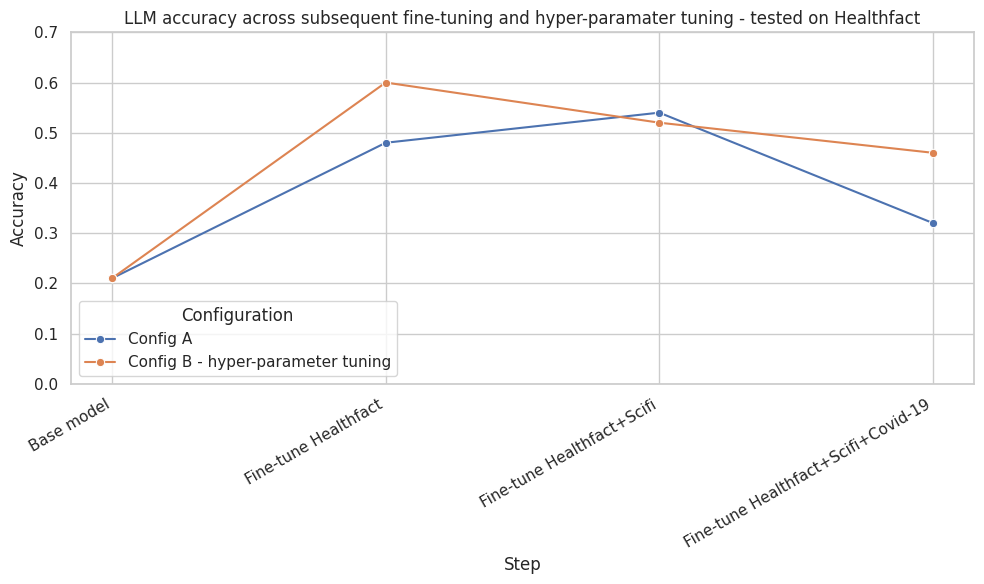

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
steps= ["Base model","Fine-tune Healthfact","Fine-tune Healthfact+Scifi","Fine-tune Healthfact+Scifi+Covid-19"]
accuracy_configA=[0.21,0.48,0.54,0.32]
accuracy_configB=[0.21,0.6,0.52,0.46]

# To use seaborn easily, let's format the data into a pandas DataFrame
data = {
    'Step': steps * 2,
    'Accuracy': accuracy_configA + accuracy_configB,
    'Configuration': ['Config A'] * len(steps) + ['Config B - hyper-parameter tuning'] * len(steps)
}
df = pd.DataFrame(data)

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size for better readability
line_plot = sns.lineplot(data=df, x="Step", y="Accuracy", hue="Configuration", marker="o")

# Increase the length of the y-axis (set limits)
# You can adjust the values (0.0 and 0.7 in this case) to fit your data range
plt.ylim(0.0, 0.7) # Set the lower and upper limits of the y-axis

# Rotate the x-axis labels
plt.xticks(rotation=30, ha='right') # Rotate labels by 30 degrees, align to the right

# Set title and labels (optional, seaborn lineplot often sets them from column names)
plt.title("LLM accuracy across subsequent fine-tuning and hyper-paramater tuning - tested on Healthfact")
plt.xlabel("Step")
plt.ylabel("Accuracy")


# Ensure layout is tight to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

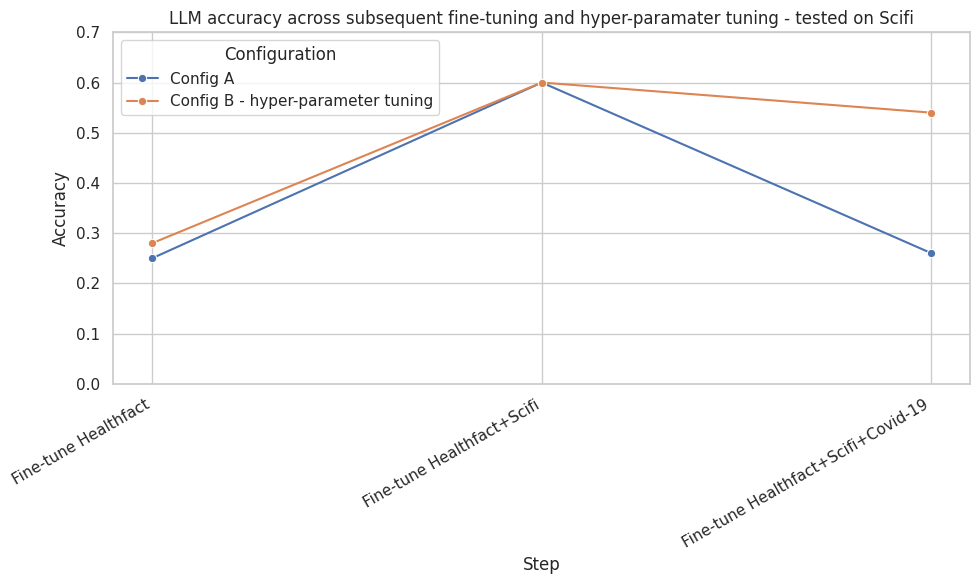

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
steps= ["Fine-tune Healthfact","Fine-tune Healthfact+Scifi","Fine-tune Healthfact+Scifi+Covid-19"]
accuracy_configA=[0.25,0.6,0.26]
accuracy_configB=[0.28,0.6,0.54]

# To use seaborn easily, let's format the data into a pandas DataFrame
data = {
    'Step': steps * 2,
    'Accuracy': accuracy_configA + accuracy_configB,
    'Configuration': ['Config A'] * len(steps) + ['Config B - hyper-parameter tuning'] * len(steps)
}
df = pd.DataFrame(data)

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size for better readability
line_plot = sns.lineplot(data=df, x="Step", y="Accuracy", hue="Configuration", marker="o")

# Increase the length of the y-axis (set limits)
# You can adjust the values (0.0 and 0.7 in this case) to fit your data range
plt.ylim(0.0, 0.7) # Set the lower and upper limits of the y-axis

# Rotate the x-axis labels
plt.xticks(rotation=30, ha='right') # Rotate labels by 30 degrees, align to the right

# Set title and labels (optional, seaborn lineplot often sets them from column names)
plt.title("LLM accuracy across subsequent fine-tuning and hyper-paramater tuning - tested on Scifi")
plt.xlabel("Step")
plt.ylabel("Accuracy")


# Ensure layout is tight to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

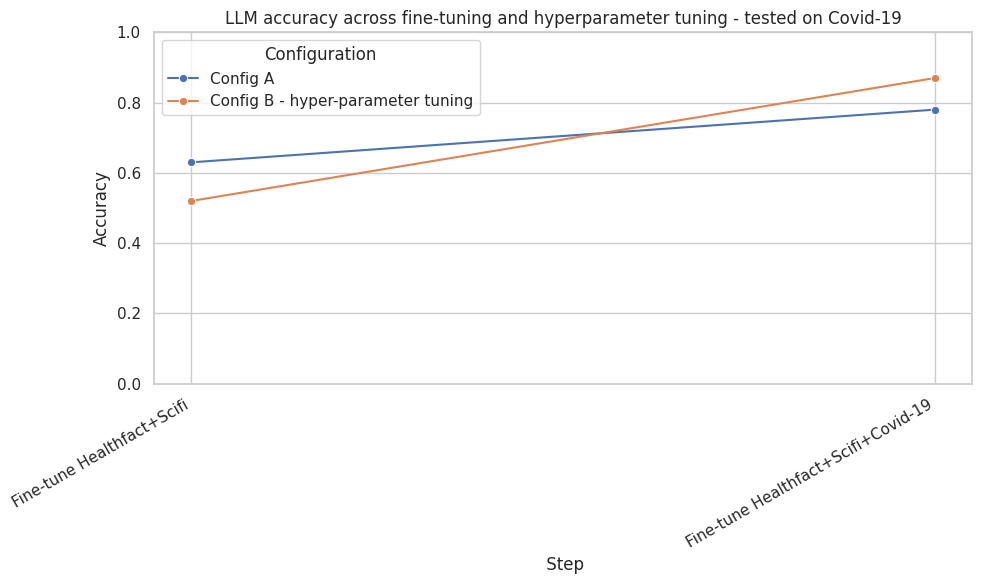

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
steps = ["Fine-tune Healthfact+Scifi", "Fine-tune Healthfact+Scifi+Covid-19"]
accuracy_configA = [0.63, 0.78]
accuracy_configB = [0.52, 0.87]

# Format into a DataFrame with numeric x-axis
data = {
    'Step ID': [0, 1] * 2,
    'Step Label': steps * 2,
    'Accuracy': accuracy_configA + accuracy_configB,
    'Configuration': ['Config A'] * 2 + ['Config B - hyper-parameter tuning'] * 2
}
df = pd.DataFrame(data)

# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot using numeric x-axis for better control
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(data=df, x="Step ID", y="Accuracy", hue="Configuration", marker="o")

# Fix x-ticks and labels
plt.xticks([0, 1], steps, rotation=30, ha='right')

# Fix y-axis range
plt.ylim(0.0, 1.0)

# Add title and labels
plt.title("LLM accuracy across fine-tuning and hyperparameter tuning - tested on Covid-19")
plt.xlabel(" Step")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


## Apply RAG to retrieve info from PubMed and implement Trust score

In [ ]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 93.5 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez
import re
from sentence_transformers import SentenceTransformer, util

Entrez.email = "alissatran1108@gmail.com"  # NCBI requires this

# Load embedding model
embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def search_pubmed(query, max_results=3):
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    return record["IdList"]

def fetch_abstracts(pubmed_ids):
    handle = Entrez.efetch(db="pubmed", id=",".join(pubmed_ids), rettype="abstract", retmode="text")
    text = handle.read()
    handle.close()
    # Split by article title or PMIDs
    abstracts = re.split(r"\n(?=[A-Z].+)", text.strip())
    return abstracts


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from Bio import Entrez
from sentence_transformers import SentenceTransformer, util

Entrez.email = "alissatran1108@gmail.com"
embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def retrieve_pubmed_evidence(claim, max_results=1):
    # Search PubMed
    handle = Entrez.esearch(db="pubmed", term=claim, retmax=max_results)
    record = Entrez.read(handle)
    ids = record["IdList"]

    if not ids:
        return ["No relevant abstracts found."], 0.0

    # Fetch abstracts
    handle = Entrez.efetch(db="pubmed", id=",".join(ids), rettype="abstract", retmode="text")
    raw_text = handle.read()
    handle.close()

    abstracts = raw_text.strip().split("\n\n")
    claim_emb = embedder.encode([claim], convert_to_tensor=True)
    abs_embs = embedder.encode(abstracts, convert_to_tensor=True)

    # Compute cosine similarities
    sims = util.cos_sim(claim_emb, abs_embs)[0]
    sorted_indices = sims.argsort(descending=True)[:max_results]
    top_abstracts = [abstracts[i] for i in sorted_indices]
    avg_sim = sims[sorted_indices].mean().item()

    return top_abstracts, avg_sim


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def generate_explanation(claim, label, top_abstracts, max_words=200):
    context = "\n".join(top_abstracts)

    # Simple explanation template (or use with LLM)
    explanation = f"""Based on the retrieved medical evidence, the claim:
**"{claim}"**
is classified as **{label.upper()}**. The following information from PubMed supports this classification:\n\n{context}"""

    # Trim to max word count
    words = explanation.split()
    if len(words) > max_words:
        explanation = " ".join(words[:max_words]) + "..."

    return explanation


In [ ]:
def respond_to_user(message, chat_history):
    try:
        label, confidence, _ = classify_claim(message)
        evidence, sim_score = retrieve_pubmed_evidence(message)
        explanation = generate_explanation(message, label, evidence)

        trust_score = round(0.7 * confidence + 0.3 * sim_score, 2)

        response = f"""
🔎 **Claim**: {message}
✅ **Classification**: `{label}`
📊 **Trust Score**: `{trust_score}`
📄 **Explanation**:
{explanation}
"""
        return response
    except Exception as e:
        return f"[ERROR] {str(e)}"


In [ ]:
import gradio as gr
import traceback
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Make sure the classifier is on the correct device and the input size is correct
base_model_dtype = model_chatbot.model.dtype

model_chatbot.classifier = model_chatbot.classifier.to(base_model_dtype)
# Ensure classifier is on the correct device
model_chatbot.eval()

model_chatbot.to(device)

label_map = {0: "true", 1: "false", 2: "misleading"}

def classify_claim(claim):
    # Tokenize
    inputs = tokenizer(claim, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Ensure model is in eval mode and on the correct device
    model_chatbot.eval()
    model_chatbot.to(device)


    # Get logits
    with torch.no_grad():
        outputs = model_chatbot(**inputs)
        logits = outputs['logits']   # Use the last token's logits if using a classification head

    # Classification from logits
    probs = F.softmax(logits.float(), dim=-1)
    pred_class = torch.argmax(probs, dim=-1).item()
    confidence = float(probs[0][pred_class])
    label = label_map[pred_class]
    return label, confidence, probs


def respond_to_user(message, chat_history):
    try:
        label, confidence, _ = classify_claim(message)
        evidence, sim_score = retrieve_pubmed_evidence(message, max_results=3)
        explanation = generate_explanation(message, label, evidence, max_words=300)

        trust_score = round(0.7 * confidence + 0.3 * sim_score, 2)

        response = f"""
🔎 **Claim**: {message}
✅ **Classification**: `{label}`
📊 **Trust Score**: `{trust_score}`

📄 **Explanation** (based on top 3 PubMed sources):
{explanation}
"""
        return response
    except Exception as e:
        return f"[ERROR] {str(e)}"




chatbot = gr.ChatInterface(
    fn=respond_to_user,
    title="Claim Verifier (LLaMA-2)",
    description="Enter a claim and get: true / false / misleading",
    examples=["COVID-19 vaccines cause infertility", "Water boils at 100°C", "The moon is made of cheese"],
)

chatbot.launch(share=True,debug=True)

/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:338: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4cce91543f02667a7f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
